# <center>Classification -- Predicting Customer Churn</center>

### <center>San Francisco</center>

# [1] Objective

Customer attrition is one of the biggest expenditures of any organization. Customer churn otherwise known as customer attrition or customer turnover is the percentage of customers that stopped using your company's product or service within a specified timeframe.

In this project, we aim to find the likelihood of a customer leaving the organization, the key indicators of churn as well as the retention strategies that can be implemented to avert this problem.

# [2] Data Understanding
The data for this project is in a csv format. The following describes the columns present in the data.

<b>Gender</b> -- Whether the customer is a male or a female

<b>SeniorCitizen</b> -- Whether a customer is a senior citizen or not

<b>Partner</b> -- Whether the customer has a partner or not (Yes, No)

<b>Dependents</b> -- Whether the customer has dependents or not (Yes, No)

<b>Tenure</b> -- Number of months the customer has stayed with the company

<b>Phone Service</b> -- Whether the customer has a phone service or not (Yes, No)

<b>MultipleLines</b> -- Whether the customer has multiple lines or not

<b>InternetService</b> -- Customer's internet service provider (DSL, Fiber Optic, No)

<b>OnlineSecurity</b> -- Whether the customer has online security or not (Yes, No, No Internet)

<b>OnlineBackup</b> -- Whether the customer has online backup or not (Yes, No, No Internet)

<b>DeviceProtection</b> -- Whether the customer has device protection or not (Yes, No, No internet service)

<b>TechSupport</b> -- Whether the customer has tech support or not (Yes, No, No internet)

<b>StreamingTV</b> -- Whether the customer has streaming TV or not (Yes, No, No internet service)

<b>StreamingMovies</b> -- Whether the customer has streaming movies or not (Yes, No, No Internet service)

<b>Contract</b> -- The contract term of the customer (Month-to-Month, One year, Two year)

<b>PaperlessBilling</b> -- Whether the customer has paperless billing or not (Yes, No)

<b>Payment Method</b> -- The customer's payment method (Electronic check, mailed check, Bank transfer(automatic), Credit card(automatic))

<b>MonthlyCharges</b> -- The amount charged to the customer monthly

<b>TotalCharges</b> -- The total amount charged to the customer

<b>Churn</b> -- Whether the customer churned or not (Yes or No)

# [3] Important Libraries
The following libraries shall be used in this project:
#### 1. numpy
    - NumPy is a Python library for numerical computations. It is widely used for scientific computing, data analysis, and machine learning.
#### 2. pandas
    - Pandas is a Python library that provides data structures and tools for data manipulation and analysis. It is commonly used for data wrangling and cleaning, and exploratory data analysis.
#### 3. sklearn
    - Scikit-learn (or sklearn) is a Python library for machine learning that provides tools for classification, regression, clustering, and dimensionality reduction, as well as for evaluating and tuning models. It offers a consistent API, handles various types of input data, and integrates well with other Python libraries such as NumPy, pandas, and matplotlib.
#### 4. matplotlib
    - Matplotlib is a Python library for creating static, animated, and interactive visualizations in Python. It provides a wide variety of plotting functions for creating line plots, scatter plots, bar plots, histograms, heatmaps, and more, and allows for customization of the style, labels, and axes of plots.
#### 5. seaborn
    -Seaborn is a Python library for creating statistical visualizations built on top of Matplotlib. It provides a high-level interface for creating informative and attractive statistical graphics such as heatmaps, scatter plots, line plots, bar plots, and distribution plots. It is commonly used for exploratory data analysis and data visualization. 

In [117]:
# Import necessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

# ML libraries
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder, StandardScaler

# Statistic libraries
import statsmodels.api as sm
from statsmodels.formula.api import ols
from scipy import stats
from scipy.stats import chi2, chi2_contingency


# Modelling Libraries
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.svm import LinearSVC, SVC
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_validate
from sklearn.ensemble import GradientBoostingClassifier

# Model evaluation libraries
from sklearn.metrics import confusion_matrix, classification_report, auc
from sklearn.metrics import precision_score, recall_score, f1_score, accuracy_score
from sklearn.metrics import roc_curve, RocCurveDisplay, roc_auc_score
from sklearn.model_selection import cross_val_predict, cross_val_score

# Save Model for future use
import joblib

# [4] Getting the Data
- We shall use one csv file called Telco_Customer_Churn.csv in this project

In [2]:
df_telco_cust = pd.read_csv('Telco_Customer_Churn.csv')

In [3]:
# See first 5 rows of df_telco_cust

df_telco_cust.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [4]:
# Get more information about the dataset
df_telco_cust.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


# [5] Data Cleaning

### See if there are any missing values in df_telco_cust

In [5]:
# See if there are any missing values in df_telco_cust
missing_values_count = df_telco_cust.isnull().sum()
print(missing_values_count)

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64


### Check for duplicates in the dataset

In [6]:
# Checking for duplicates
df_telco_cust.drop_duplicates(inplace=True, keep='first')

In [7]:
df_telco_cust

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,6840-RESVB,Male,0,Yes,Yes,24,Yes,Yes,DSL,Yes,...,Yes,Yes,Yes,Yes,One year,Yes,Mailed check,84.80,1990.5,No
7039,2234-XADUH,Female,0,Yes,Yes,72,Yes,Yes,Fiber optic,No,...,Yes,No,Yes,Yes,One year,Yes,Credit card (automatic),103.20,7362.9,No
7040,4801-JZAZL,Female,0,Yes,Yes,11,No,No phone service,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.60,346.45,No
7041,8361-LTMKD,Male,1,Yes,No,4,Yes,Yes,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Mailed check,74.40,306.6,Yes


#### There were no duplicates in the dataset

### See all unique values in every column in df_telco_cust dataset

In [8]:
# see all unique values in every column in df_telco_cust dataset
for column in df_telco_cust.columns:
    print(column, ":", df_telco_cust[column].unique())

customerID : ['7590-VHVEG' '5575-GNVDE' '3668-QPYBK' ... '4801-JZAZL' '8361-LTMKD'
 '3186-AJIEK']
gender : ['Female' 'Male']
SeniorCitizen : [0 1]
Partner : ['Yes' 'No']
Dependents : ['No' 'Yes']
tenure : [ 1 34  2 45  8 22 10 28 62 13 16 58 49 25 69 52 71 21 12 30 47 72 17 27
  5 46 11 70 63 43 15 60 18 66  9  3 31 50 64 56  7 42 35 48 29 65 38 68
 32 55 37 36 41  6  4 33 67 23 57 61 14 20 53 40 59 24 44 19 54 51 26  0
 39]
PhoneService : ['No' 'Yes']
MultipleLines : ['No phone service' 'No' 'Yes']
InternetService : ['DSL' 'Fiber optic' 'No']
OnlineSecurity : ['No' 'Yes' 'No internet service']
OnlineBackup : ['Yes' 'No' 'No internet service']
DeviceProtection : ['No' 'Yes' 'No internet service']
TechSupport : ['No' 'Yes' 'No internet service']
StreamingTV : ['No' 'Yes' 'No internet service']
StreamingMovies : ['No' 'Yes' 'No internet service']
Contract : ['Month-to-month' 'One year' 'Two year']
PaperlessBilling : ['Yes' 'No']
PaymentMethod : ['Electronic check' 'Mailed check' 'Bank tr

### Show  the number of unique values per column

In [9]:
#  the number of unique values per column
for column in df_telco_cust.columns:
    print(column, ":", df_telco_cust[column].nunique())

customerID : 7043
gender : 2
SeniorCitizen : 2
Partner : 2
Dependents : 2
tenure : 73
PhoneService : 2
MultipleLines : 3
InternetService : 3
OnlineSecurity : 3
OnlineBackup : 3
DeviceProtection : 3
TechSupport : 3
StreamingTV : 3
StreamingMovies : 3
Contract : 3
PaperlessBilling : 2
PaymentMethod : 4
MonthlyCharges : 1585
TotalCharges : 6531
Churn : 2


# [6] Transformation and Feature Engineering

### Check the data types of the TotalCharges and MonthlyCharges columns in the df_telco_cust dataframe

In [10]:
# Check the data type of the TotalCharges column in the df_telco_cust dataframe
print(df_telco_cust['TotalCharges'].dtype)
print(df_telco_cust['MonthlyCharges'].dtype)

object
float64


### Check if there are any non-numeric values in df_telco_cust['TotalCharges']

In [11]:
# Check for non-numeric values by checking for NaN values in the column
has_non_numeric_values = df_telco_cust['TotalCharges'].isnull().any()

if has_non_numeric_values:
    print("There are non-numeric values in the 'TotalCharges' column.")
else:
    print("All values in the 'TotalCharges' column are numeric.")

All values in the 'TotalCharges' column are numeric.


### Transform TotalCharges from object to float data type
To transform the TotalCharges column from object to float in the df_telco_cust dataframe, we can use the astype() method of pandas.

In [12]:
# Transform the TotalCharges column from object to float 
# Convert 'TotalCharges' to numeric type
df_telco_cust['TotalCharges'] = pd.to_numeric(df_telco_cust['TotalCharges'], errors='coerce')

# Impute missing values with the mean
imputer = SimpleImputer(strategy='mean')
df_telco_cust['TotalCharges'] = imputer.fit_transform(df_telco_cust[['TotalCharges']])

In [13]:
# Again check the data type of the TotalCharges column in the df_telco_cust dataframe
print(df_telco_cust['TotalCharges'].dtype)

float64


In [14]:
df_telco_cust

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,6840-RESVB,Male,0,Yes,Yes,24,Yes,Yes,DSL,Yes,...,Yes,Yes,Yes,Yes,One year,Yes,Mailed check,84.80,1990.50,No
7039,2234-XADUH,Female,0,Yes,Yes,72,Yes,Yes,Fiber optic,No,...,Yes,No,Yes,Yes,One year,Yes,Credit card (automatic),103.20,7362.90,No
7040,4801-JZAZL,Female,0,Yes,Yes,11,No,No phone service,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.60,346.45,No
7041,8361-LTMKD,Male,1,Yes,No,4,Yes,Yes,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Mailed check,74.40,306.60,Yes


In [15]:
# See again if there are any missing values in df_telco_cust
missing_values_count = df_telco_cust.isnull().sum()
print(missing_values_count)

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64


# [7] Univeriate Analysis

#### Gender
- The code below creates a horizontal bar chart showing the count of each gender in the "gender" column of the "df_telco_cust" DataFrame.

- The "value_counts()" method is used to count the number of occurrences of each gender in the "gender" column, and the resulting object is stored in the "gender_count" variable.

- A list of two colors, "red" and "green", is created and stored in the "colors" variable.

- The "plot()" method of the "gender_count" object is then used to create a horizontal bar chart, with the "kind" parameter set to "barh" to specify the chart type and the "color" parameter set to "colors" to specify the color scheme.

- A for loop is used to loop through each bar in the chart and annotate the actual count in the center of each bar using the "text()" method of the "ax" object.

- Finally, the chart is given a title, labels for the x and y axes, and a size using various functions of the "plt" module, and displayed using the "show()" method of the "plt" module.

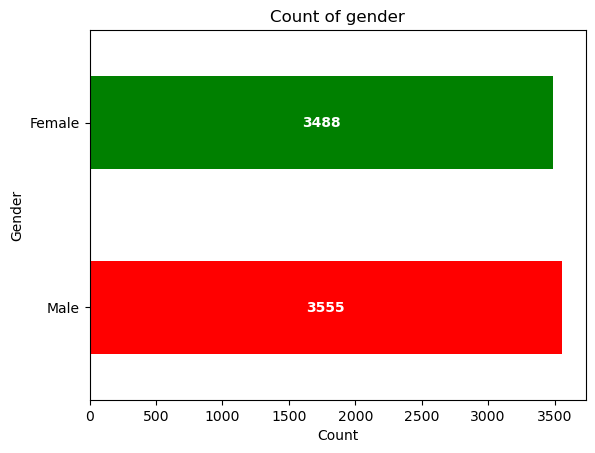

<Figure size 600x400 with 0 Axes>

In [16]:
# counts the number of occurrences of each gender in the 'gender' column of the 
gender_count = df_telco_cust['gender'].value_counts()

# list of colors to be used in the bar chart.
colors = ['red', 'green']

# This line creates the horizontal bar chart using the plot() function of the gender_count object
ax = gender_count.plot(kind='barh', color=colors)


# Loop through the bars and annotate the actual count in the center of each bar
for i, v in enumerate(gender_count):
    ax.text(v/2, i, str(v), color='white', fontweight='bold', ha='center', va='center')

# Adding label, title and size
plt.title('Count of gender')
plt.xlabel('Count')
plt.ylabel('Gender')
plt.figure(figsize=(6,4))

plt.show()

From the plot we see that Female and Male are almost equally distributed with a difference of only 67.

### Senior Citizens
- The code below creates a horizontal bar chart that displays the count of senior and non-senior citizens in a dataset. The code first uses the value_counts() function to count the number of occurrences of each value in the 'SeniorCitizen' column of the dataset. It then creates a list of colors to use in the bar chart and uses the plot() function of the citizen_count object to create a horizontal bar chart.

- The code then loops through the bars and annotates the actual count in the center of each bar using the text() function. - Finally, the code adds a label, title, and size to the chart before displaying it using plt.show().

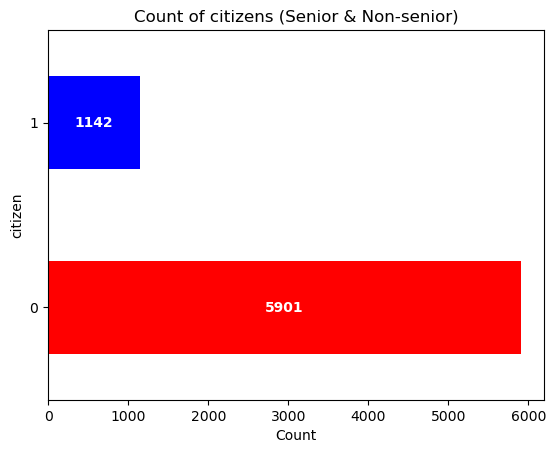

<Figure size 600x400 with 0 Axes>

In [17]:
# This code will plot a horizontal bar chart showing the count of senior and non-senior citizens 
citizen_count = df_telco_cust['SeniorCitizen'].value_counts()

# list of colors to be used in the bar chart.
colors = ['red', 'blue']

# This line creates the horizontal bar chart using the plot() function of the citizen_count object
ax = citizen_count.plot(kind='barh', color=colors)

# Loop through the bars and annotate the actual count in the center of each bar
for i, v in enumerate(citizen_count):
    ax.text(v/2, i, str(v), color='white', fontweight='bold', ha='center', va='center')
    
# Adding label, title and size
plt.title('Count of citizens (Senior & Non-senior)')
plt.xlabel('Count')
plt.ylabel('citizen')
plt.figure(figsize=(6,4))

plt.show()

From the plot see that the ratio of Senior Citizens to Non-Senior Citizen is about 1:5. With Non-Seniors constituting about 84% of the whole distribution.

### Tenure
The code below creates a histogram plot for the 'tenure' variable from the 'df_telco_cust' dataframe using the Seaborn library in Python.

- The 'sns.histplot' function is used to create the histogram plot, with the 'df_telco_cust['tenure']' argument specifying the data to be plotted.

- The 'kde=True' argument adds a kernel density estimate plot to the histogram, providing a smoothed line that shows the distribution of values in the data.

- The 'color' argument is used to set the color of the histogram bars to red.

- Overall, the code is a simple and effective way to visually explore the distribution of values in the 'tenure' variable of the 'df_telco_cust' dataframe.

<AxesSubplot:xlabel='tenure', ylabel='Count'>

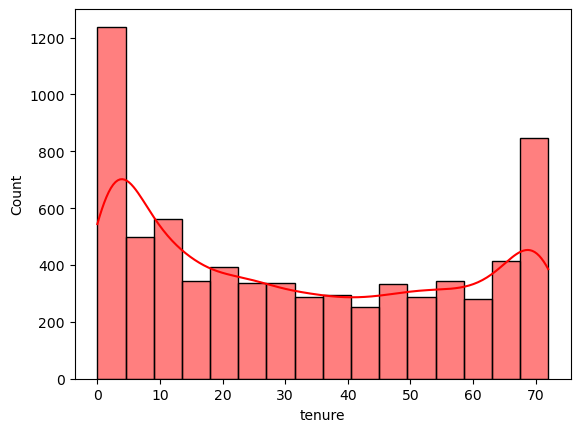

In [18]:
# creates a histogram plot using the Seaborn library in Python.
sns.histplot(df_telco_cust['tenure'], kde=True, color='red')

From the graph, we visualize that there is almost a uniform distribution of Tenure between 10 to 65 months at about 400 customers each and a peek of slightly above 1200 customers with a Tenure 0-5 months and a gain a peek of about 800 customers with a Tenure of 70 and above months.

### Streaming Movies
The code below generates a horizontal bar chart that displays the count of different streaming movies that customers have subscribed to.

1. The first line counts the number of occurrences of each value in the 'StreamingMovies' column of the DataFrame and stores the result in the S_movie_count variable.

2. The second line creates a list of three colors to be used in the horizontal bar chart.

3. The third line creates the horizontal bar chart using the plot() method of the S_movie_count object with the kind parameter set to 'barh' for horizontal bars, and the color parameter set to the list of colors.

4. The fourth line uses a for loop to annotate the actual count of each value in the center of its respective bar.

5. Finally, the code adds a title and labels for the x and y-axes, sets the size of the figure, and shows the plot using the show() function.

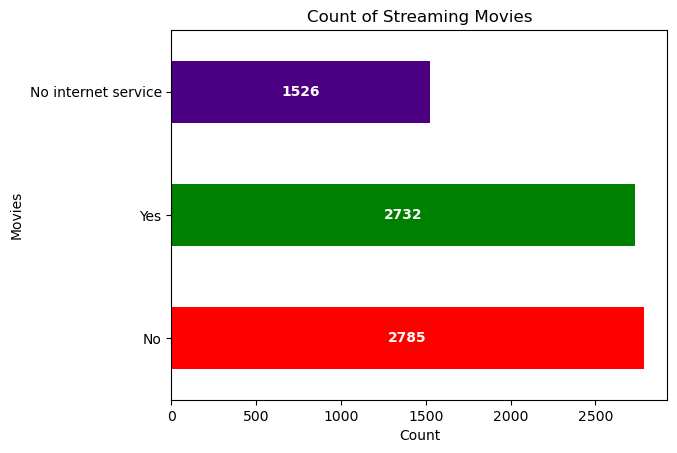

<Figure size 600x400 with 0 Axes>

In [19]:
# First, we obtain a count of the different values in the 'StreamingMovies' 
# column of a Pandas DataFrame named 'df_telco_cust'
S_movie_count = df_telco_cust['StreamingMovies'].value_counts()

# Next, we define a list of colors for the bars in the horizontal bar chart
colors = ['red', 'green', 'indigo']

# We create the horizontal bar chart using the Pandas plot() method, with the kind parameter set to 'barh' for horizontal bars,
# and the color parameter set to the list of colors we defined earlier
ax = S_movie_count.plot(kind='barh', color=colors)

# Loop through the bars and annotate the actual count in the center of each bar
for i, v in enumerate(S_movie_count):
    ax.text(v/2, i, str(v), color='white', fontweight='bold', ha='center', va='center')

# Adding label, title and size
plt.title('Count of Streaming Movies')
plt.xlabel('Count')
plt.ylabel('Movies')
plt.figure(figsize=(6,4))

plt.show()

Customers who have streaming movies connections are 2732 and those without are 2785 (only a difference of 53 between the two) with those with no Internet being only 1526.

### MultipleLines
The code below is plotting a horizontal bar chart that shows the count of customers with multiple phone lines, categorized by the different types of multiple lines available to them.

1. First, the code creates a Pandas Series object called Multi_count that contains the count of each unique value in the 'MultipleLines' column of the 'df_telco_cust' DataFrame.

2. Next, a list of colors is defined to be used for the bars in the horizontal bar chart.

3. Then, the horizontal bar chart is created using the plot() method of the Multi_count object, with the kind parameter set to 'barh' for horizontal bars and the color parameter set to the list of colors previously defined.

4. After that, the code loops through each bar in the chart and annotates the actual count in the center of each bar using the text() method.

5. Finally, the code adds a title, xlabel and ylabel to the chart using the title(), xlabel() and ylabel() methods, respectively, and sets the figure size using the figure() method. The chart is then displayed using the show() method.

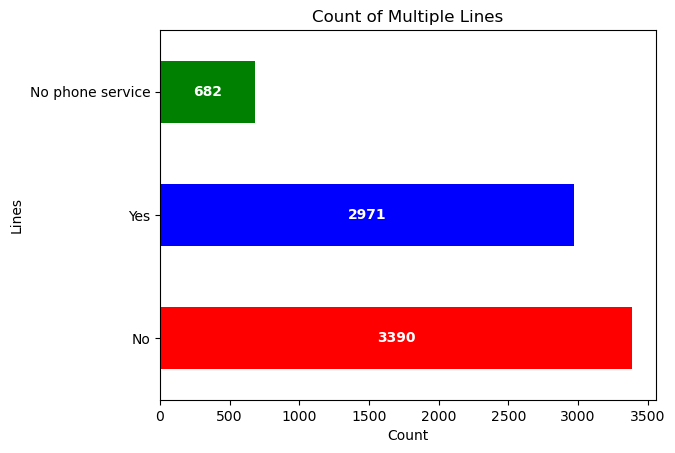

<Figure size 600x400 with 0 Axes>

In [20]:
# First, we obtain a count of the different values in the 'MultipleLines' 
# column of a Pandas DataFrame named 'df_telco_cust'
Multi_count = df_telco_cust['MultipleLines'].value_counts()

# Next, we define a list of colors for the bars in the horizontal bar chart
colors = ['red', 'blue', 'green']

# We create the horizontal bar chart using the Pandas plot() method, with the kind parameter set to 
# 'barh' for horizontal bars,and the color parameter set to the list of colors we defined earlier
ax = Multi_count.plot(kind='barh', color=colors)

# Loop through the bars and annotate the actual count in the center of each bar
for i, v in enumerate(Multi_count):
    ax.text(v/2, i, str(v), color='white', fontweight='bold', ha='center', va='center')

# Adding label, title and size
plt.title('Count of Multiple Lines')
plt.xlabel('Count')
plt.ylabel('Lines')
plt.figure(figsize=(6,4))

plt.show()

The bar graph shows the distribution of customers with or without Multiplelines as follows: No Multiple lines: 48%, With Multiplelines: 42% and  those with no phone services: 10%.

### Online Security
The code below createsa horizontal bar chart to display the count of different values in the 'OnlineSecurity' column of a Pandas DataFrame named 'df_telco_cust'.

1. The first line of the code counts the number of occurrences of each value in the 'OnlineSecurity' column of the 'df_telco_cust' DataFrame, and stores the result in the variable 'Security_count'.

2. Then, a list of colors for the bars in the horizontal bar chart is defined as 'colors'.

3. The horizontal bar chart is created using the Pandas plot() method, with the kind parameter set to 'barh' for horizontal bars, and the color parameter set to the list of colors defined earlier. The resulting plot is stored in the variable 'ax'.

4. Next, a loop is used to iterate through each bar in the plot and annotate the actual count of each value in the center of each bar.

5. Finally, the plot is given a title, axis labels, and a size, and is displayed using the matplotlib.pyplot.show() function.

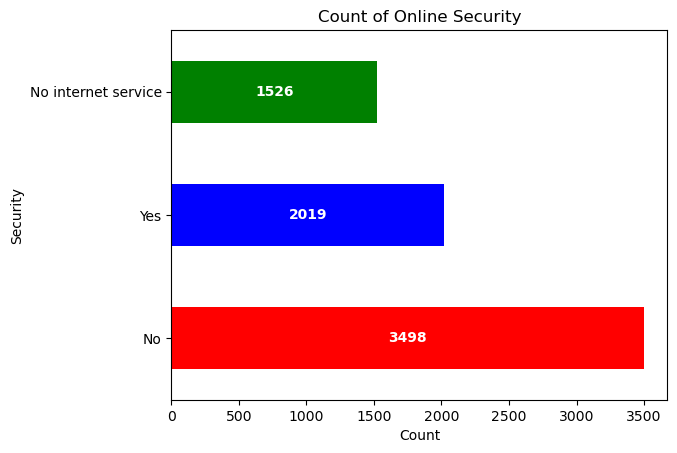

<Figure size 600x400 with 0 Axes>

In [21]:
# First, we obtain a count of the different values in the 'OnlineSecurity' 
# column of a Pandas DataFrame named 'df_telco_cust'
Security_count = df_telco_cust['OnlineSecurity'].value_counts()

# Next, we define a list of colors for the bars in the horizontal bar chart
colors = ['red', 'blue', 'green']

# We create the horizontal bar chart using the Pandas plot() method, with the kind parameter 
# set to 'barh' for horizontal bars, and the color parameter set to the list of colors we defined earlier
ax = Security_count.plot(kind='barh', color=colors)

# Loop through the bars and annotate the actual count in the center of each bar
for i, v in enumerate(Security_count):
    ax.text(v/2, i, str(v), color='white', fontweight='bold', ha='center', va='center')

# Adding label, title and size
plt.title('Count of Online Security')
plt.xlabel('Count')
plt.ylabel('Security')
plt.figure(figsize=(6,4))

plt.show()

The graph shows that customers without Online Security constitute around 50% followed by those with online security at 29% and the rest have no Internet service.

### Partner
The code below creates a horizontal bar chart to show the count of customers who have a partner and those who don't.

1. The first line of code gets the count of the different values in the 'Partner' column of the Pandas DataFrame 'df_telco_cust' using the value_counts() method.

2. Next, a list of colors for the bars in the horizontal bar chart is defined.

3. The horizontal bar chart is then created using the plot() method of the partner_count object with the parameters kind='barh' for horizontal bars and color=colors for the colors of the bars.

4. The for loop is used to loop through the bars and annotate the actual count in the center of each bar using the text() method of the ax object.

5. Finally, the code adds labels, title, and sets the figure size before displaying the chart using the show() method of the pyplot module in matplotlib.

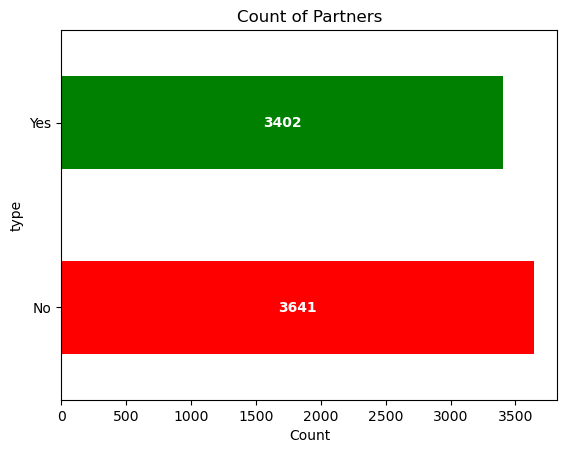

<Figure size 600x400 with 0 Axes>

In [22]:
# First, we obtain a count of the different values in the 'Partner' 
# column of a Pandas DataFrame named 'df_telco_cust'
partner_count = df_telco_cust['Partner'].value_counts()

# Next, we define a list of colors for the bars in the horizontal bar chart
colors = ['red', 'green']

# We create the horizontal bar chart using the Pandas plot() method, with the kind parameter set to 
# 'barh' for horizontal bars, and the color parameter set to the list of colors we defined earlier
ax = partner_count.plot(kind='barh', color=colors)

# Loop through the bars and annotate the actual count in the center of each bar
for i, v in enumerate(partner_count):
    ax.text(v/2, i, str(v), color='white', fontweight='bold', ha='center', va='center')

# Adding label, title and size
plt.title('Count of Partners')
plt.xlabel('Count')
plt.ylabel('type')
plt.figure(figsize=(6,4))

plt.show()

Customers without partners make the majority at around 52% and those with parners at 48%.

# [8] Bivariate and Multivariate Analysis

## Bivariate Analysis
### Gender vs Churn
The code below creates a pivot table from a Pandas DataFrame df_telco_cust. The pivot_table() method is used to group and aggregate the data based on the provided parameters. The pivot table is created by specifying that the values to be aggregated are in the 'Contract' column, with the index being the 'gender' column, and the columns being the 'Churn' column. The aggregation function is set to 'count', which counts the number of occurrences of each unique combination of 'gender' and 'Churn'.

The resulting pivot table is printed using the print() function. It will display the counts of the 'Contract' column for each unique combination of 'gender' and 'Churn' in a tabular format.

In [23]:
# Create a pivot table of contracts counts by gender and churn
pivot_table = pd.pivot_table(df_telco_cust, values = ['Contract'], index=['gender'], columns=['Churn'], aggfunc='count')

# Print the pivot table
print(pivot_table)

       Contract     
Churn        No  Yes
gender              
Female     2549  939
Male       2625  930


## Visualization
The code below generates a stacked bar chart of the pivot table created in the previous code block.

1. pivot_table.plot(kind='bar', stacked=True) creates the bar chart with the stacked parameter set to True to stack the bars on top of each other.

2. plt.title('Count of Contract by gender and Churn') sets the chart title to "Count of Contract by gender and Churn". plt.xlabel('gender') sets the x-axis label to "gender", and plt.ylabel('Count') sets the y-axis label to "Count".

3. plt.legend(loc='upper right', bbox_to_anchor=(1.2, 1)) adds a legend to the chart with the location set to 'upper right' and the bounding box anchor set to (1.2, 1), which means that the legend will be located outside the plot area to the right and above the chart.

4. plt.xticks(rotation=0) adjusts the rotation of the x-axis labels to be horizontal for better readability.

5. Finally, plt.show() displays the chart.

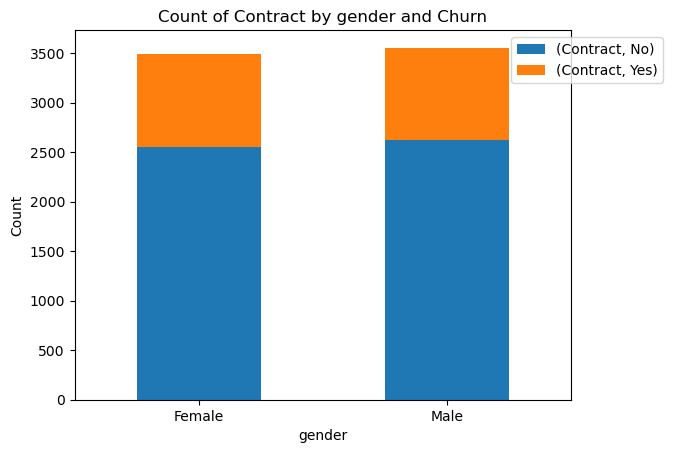

In [24]:
# We create a bar chart using a pivot table with the Pandas plot() method, with the kind parameter set to 
# 'bar' for vertical bars, and the stacked parameter set to True to stack the bars on top of each other
pivot_table.plot(kind='bar', stacked=True)

# Adding label, title and size
plt.title('Count of Contract by gender and Churn')
plt.xlabel('gender')
plt.ylabel('Count')
plt.legend(loc='upper right', bbox_to_anchor=(1.2, 1))
# We adjust the rotation of the x-axis labels to be horizontal for better readability
plt.xticks(rotation=0)
plt.show()

The stacked-bar chart shows that Female and Male are almost uniformly distributed considering those who churn and those who don't.

### SeniorCitizens vs Churn
The code below creates a bar plot using the Seaborn library. 
- It visualizes the relationship between the SeniorCitizen column and Churn column of a given Pandas DataFrame df_telco_cust. 
- The x parameter specifies the column to be plotted on the x-axis and the y parameter specifies the column to be plotted on the y-axis. 
- The hue parameter specifies the column to use to distinguish the different bars in the plot. In this case, the hue parameter is set to 'gender', which means that the bars are grouped by gender. 
- The resulting plot shows the count of churned and non-churned customers based on whether they are senior citizens or not, with bars distinguished by gender.

<AxesSubplot:xlabel='SeniorCitizen', ylabel='Churn'>

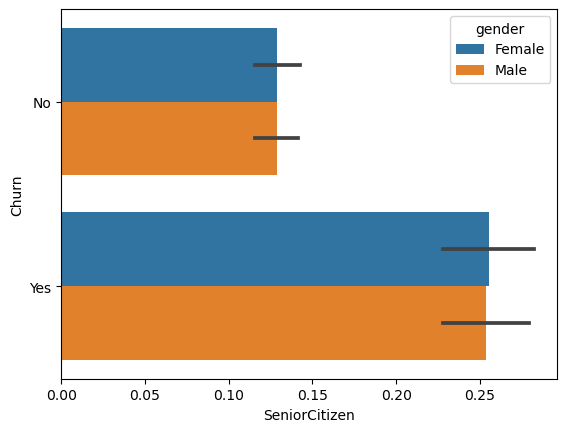

In [25]:
sns.barplot(data=df_telco_cust, x='SeniorCitizen', y='Churn', hue='gender')

The graph shows that many senior citizens churn and the distribution is uniform between male and female.

### Partner vs Churn
The code below creates a count plot with the x-axis being Partner and the hue (color) representing Churn. The plot will show the number of customers who churned and who didn't churn with and without a partner.

<AxesSubplot:xlabel='Partner', ylabel='count'>

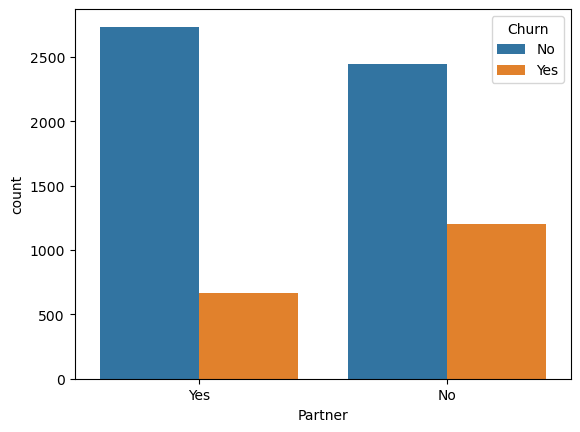

In [26]:
sns.countplot(data=df_telco_cust, x='Partner', hue='Churn')

Those without partners tend to churn more than those with partners.

### Dependent vs 
The code below creates a bar plot with the number of customers with and without Dependents, grouped by whether they have Churned or not. The countplot() function in seaborn counts the number of occurrences of each category and creates a bar plot of the counts.

<AxesSubplot:xlabel='Dependents', ylabel='count'>

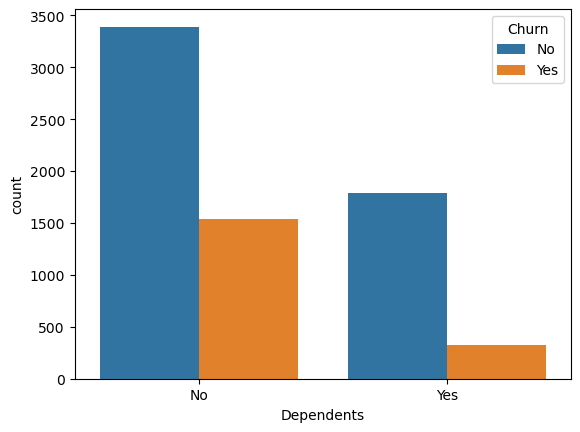

In [27]:
sns.countplot(x='Dependents', hue='Churn', data=df_telco_cust)

Those without dependents tend to churn more than those with dependents.

### MonthlyCharges vs Churn
- The code below creates a box plot using Seaborn library to visualize the relationship between the "MonthlyCharges" and "Churn" variables in the "df_telco_cust" dataset.

- The box plot is created using the boxplot() function in Seaborn, with "MonthlyCharges" as the x-axis and "Churn" as the y-axis. The data parameter specifies the DataFrame to use.

- After creating the box plot, the code sets the x-axis and y-axis labels using xlabel() and ylabel() functions, respectively. It also sets the title of the plot using title() function.

- Finally, the code displays the plot using show() function.

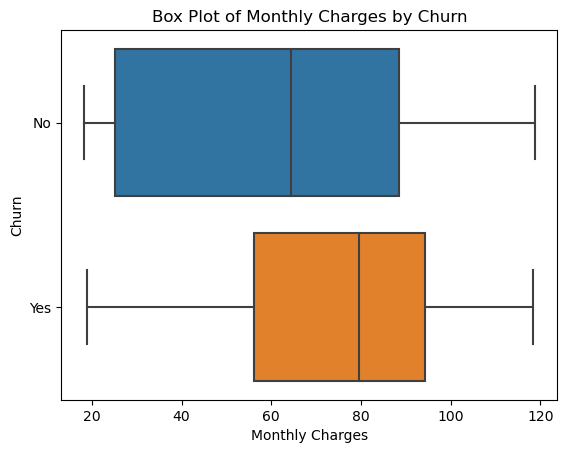

In [28]:
# create a box plot using boxplot() function
sns.boxplot(x="MonthlyCharges", y="Churn", data=df_telco_cust)

# set x-axis and y-axis labels and plot title
plt.xlabel("Monthly Charges")
plt.ylabel("Churn")
plt.title("Box Plot of Monthly Charges by Churn")

# display the plot
plt.show()

- By looking at the box plot, we can see that there are significant differences in the distribution of monthly charges for customers who churned compared to those who did not churn. 
    1. The median for those who don't churn is about 62 with 1st quartile of about 25 and 3rd quartile of about 90.
    2. The median for those who churn is about 80 with 1st quartile of about 55 and 3rd quartile of about 95.

### TotalCharges vs Churn
The code below creates a box plot to show the distribution of total charges for customers who have churned versus those who have not churned.

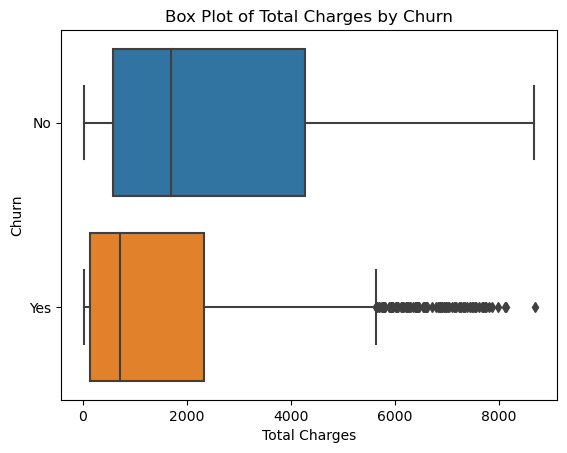

In [29]:
# create a box plot using boxplot() function
sns.boxplot(x="TotalCharges", y="Churn", data=df_telco_cust)

# set x-axis and y-axis labels and plot title
plt.xlabel("Total Charges")
plt.ylabel("Churn")
plt.title("Box Plot of Total Charges by Churn")

# display the plot
plt.show()

Customers who tend to churn have their median Total Charges of about 500 but with several outliers beyond 5000.

### Internet Service vs Churn
The below creates a count plot showing the number of customers in each category of Internet Service (DSL, Fiber optic, or No) with the hue representing the Churn status (Yes or No).

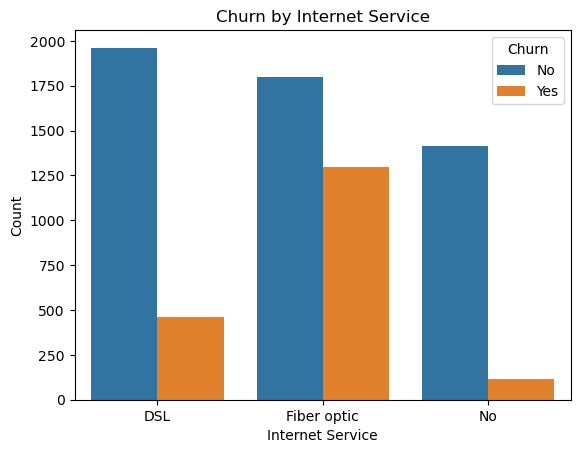

In [30]:
sns.countplot(data=df_telco_cust, x='InternetService', hue='Churn')
plt.xlabel("Internet Service")
plt.ylabel("Count")
plt.title("Churn by Internet Service")
plt.show()

It appears that those who churn most are those with Fiber optic Internet Service.

### PaymentMethod vs Churn
The code below generates a stacked bar chart that shows the relationship between Payment Method and Churn in the telco customer dataset.

1. The code first creates a contingency table of PaymentMethod and Churn using the pd.crosstab() function. This table summarizes the number of customers who churned and did not churn for each payment method.

2. Then, the code sets the figure size using plt.figure(figsize=(16,14)) and creates a stacked bar plot of the contingency table using payment_churn_table.plot(kind='bar', stacked=True). The stacked bar plot shows the number of customers for each payment method, with the different colors representing the number of customers who churned and did not churn.

3. Finally, the code sets the plot title, axis labels, and rotates the x-axis labels for better visibility using plt.title(), plt.xlabel(), plt.ylabel(), and plt.xticks(rotation=15) functions respectively. The plot is then displayed using plt.show().

<Figure size 1600x1400 with 0 Axes>

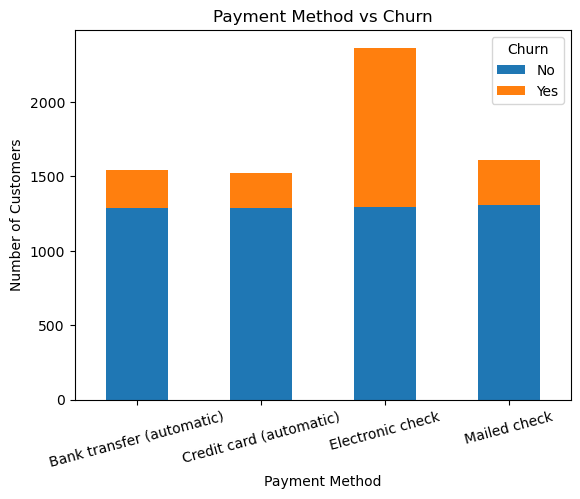

In [31]:
# create a contingency table of PaymentMethod and Churn
payment_churn_table = pd.crosstab(df_telco_cust['PaymentMethod'], df_telco_cust['Churn'])

plt.figure(figsize=(16,14))
# create a stacked bar plot
payment_churn_table.plot(kind='bar', stacked=True)

# set plot title and axis labels
plt.title('Payment Method vs Churn')
plt.xlabel('Payment Method')
plt.ylabel('Number of Customers')

plt.xticks(rotation=15)

# display the plot
plt.show()

From the stack-bar chart it appears that those who churn most are those with Electronic check as a Payment Method.

## Multivariate Analysis

### Correletation of the Features in the dataset
The resulting heatmap shows the correlation coefficients between all pairs of variables in the dataset. Darker colors indicate stronger correlations (either positive or negative), while lighter colors indicate weaker or no correlations. The diagonal of the matrix (i.e., the correlation of each variable with itself) is always 1.

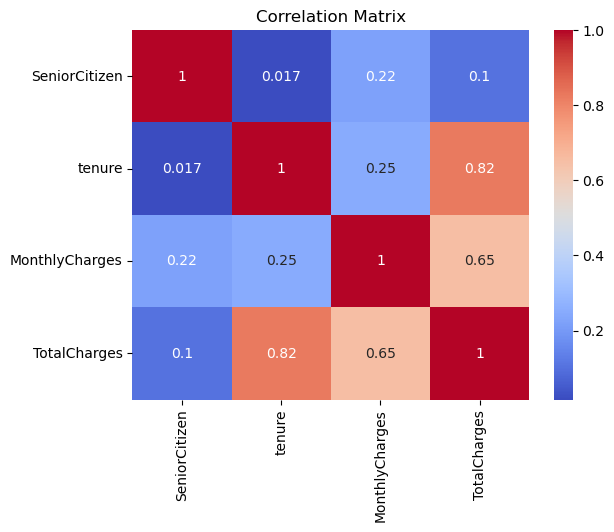

In [32]:
# compute the correlation matrix
corr_matrix = df_telco_cust.corr()

# create a heatmap using seaborn
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')

# set the title
plt.title('Correlation Matrix')

# show the plot
plt.show()

From the heatmap, we seen that there is very high correlation (0.82) between TotalCharges and tenure, also a fairly strong correlation of 0.65 between TotalCharges and MonthlyCharges.

### Scatter Matrix
- In the codebelow, we first select the columns that we want to include in the scatter plot matrix (in this case, tenure, MonthlyCharges, TotalCharges, and Churn). 
- We then create the scatter plot matrix using the pairplot() function from the Seaborn library. 
- The hue parameter is set to Churn so that the scatter plots are colored by the Churn variable. 
- The diag_kind parameter is set to 'hist' to show histograms on the diagonal instead of scatter plots. 
- Finally, we display the plot using plt.show().

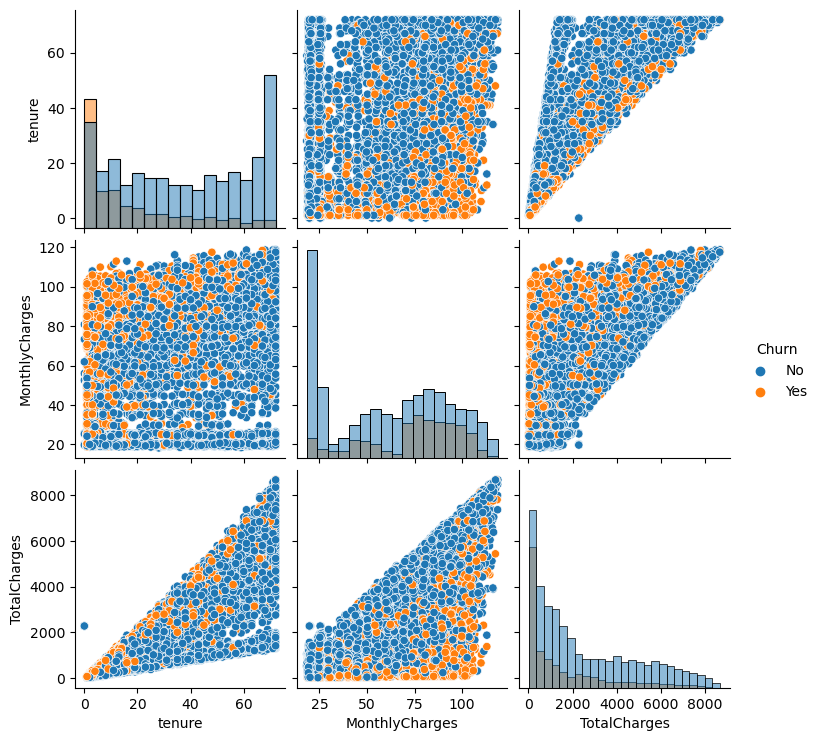

In [33]:
# select columns to include in the scatter plot matrix
cols = ['tenure', 'MonthlyCharges', 'TotalCharges', 'Churn']

# create scatter plot matrix using pairplot() function
sns.pairplot(df_telco_cust[cols], hue='Churn', diag_kind='hist')

# display the plot
plt.show()

From the Scatter Maatrix:
- Those with less than 40 months and MonthlyCharges above 80 tend to churn a lot.
- Those with MonthlyCharges in excess of 75 and TotalCharges below 4000 tend to churn more.
- And that tenure and TotalCharges have positive correlation

# [9] Questions and Hypotheses Testing

To further understand the Data we are going to ask and provide answers to the following questions and hypothesis

## Questions
1. <b>Does the type of internet service affect churn rate?<b>
2. <b>Are customers who have paperless billing more likely to churn?<b>
3. <b>Does the tenure of a customer affect churn rate?<b>
4. <b>Does having multiple lines affect churn rate?<b>
5. <b>Are customers on month to month contracts more likely to churn compared to customers on long term contracts<b>
    
## Hypothesis NO.1

H0: <b>The type of internet service does not affect churn rate<b>
    
H1: <b>customers Dsl or no internet service are more likely to churn compared to customers with fiber optic<b>

## Hypothesis NO.2

H0: <b>Paperless billing does not affect churn rate<b>
    
H1: <b>Customers with paperless billing are more likely to churn compared to customers who receive paper bill<b>

## Hypothesis NO.3
H0: <b>Tenure of a customer does not affect churn rate<b>
    
H1: <b>Customers who have been with the company for a longer tenure are less likely to churn compared to customers with shorter tenure<b>

### [Q1] Does the type of internet service affect churn rate?

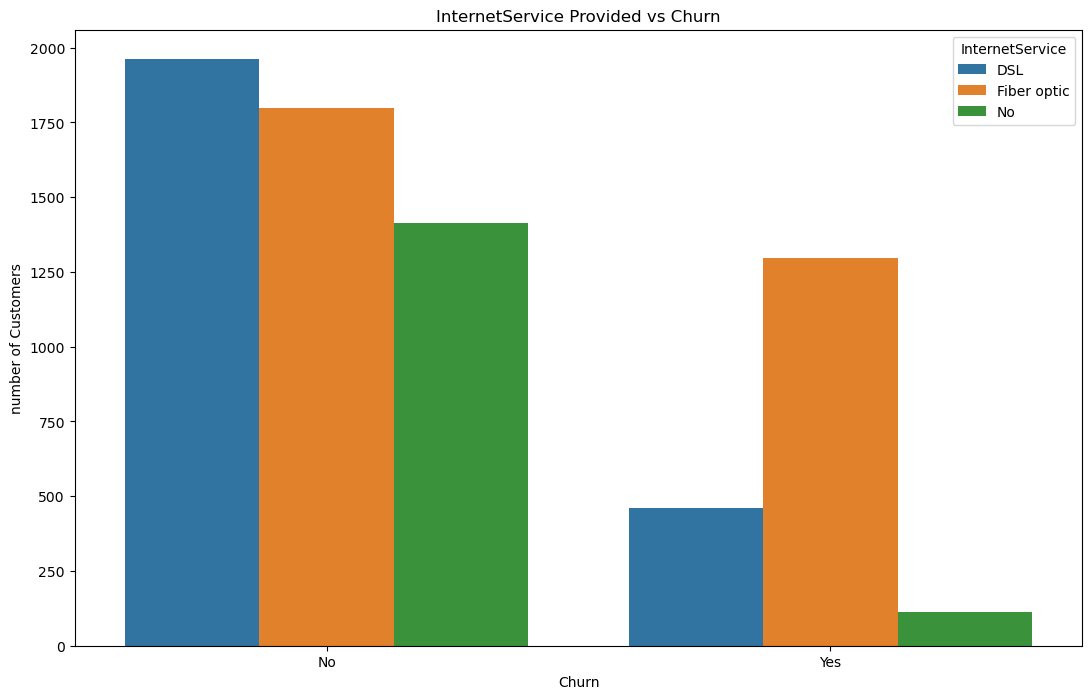

In [34]:
#Groupby the internet service type and churn

int_type=df_telco_cust.groupby(by=["InternetService","Churn"],as_index=False)["Churn"].value_counts(ascending=False)

plt.figure(figsize=(13,8))
sns.barplot(int_type["Churn"],int_type["count"],hue=int_type["InternetService"]);
plt.title("InternetService Provided vs Churn");
plt.ylabel("number of Customers");

- A lot of customers using the Fiber optic seems to leave the the company followed by DSL.
- As shown in the plot above further analysis will have to be made as to why, fiber users tend to leave the company the most

## [Q2] Are customers who have paperless billing more likely to churn?

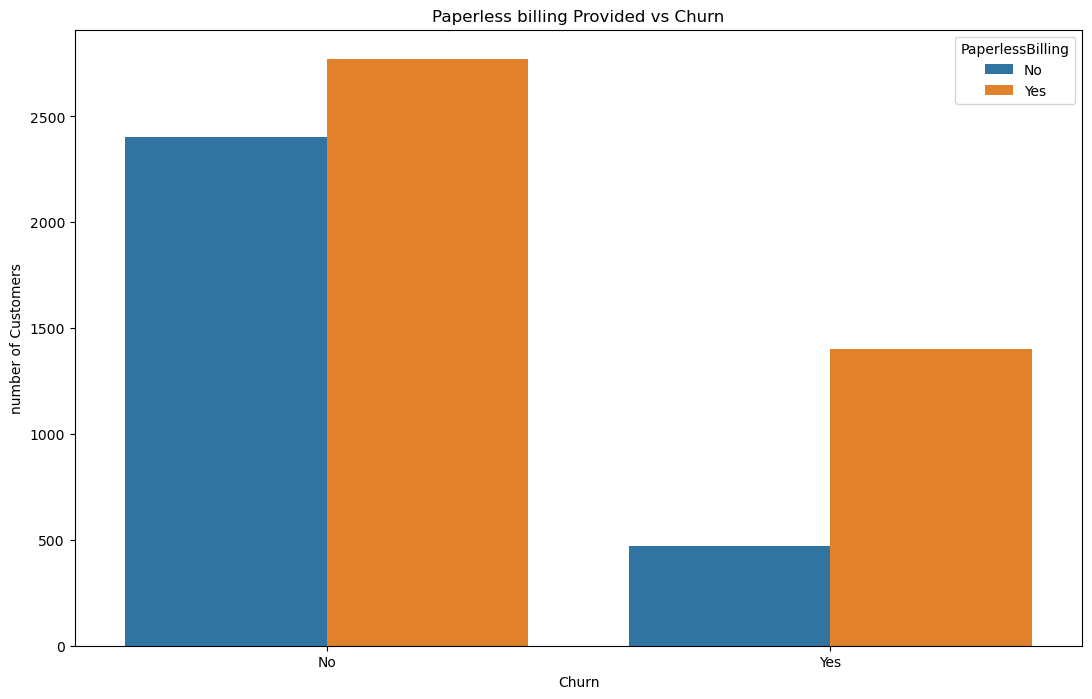

In [35]:
int_type=df_telco_cust.groupby(by=["PaperlessBilling","Churn"],as_index=False)["Churn"].value_counts(ascending=False)
plt.figure(figsize=(13,8))
sns.barplot("Churn","count",data=int_type,hue="PaperlessBilling");
plt.title("Paperless billing Provided vs Churn");
plt.ylabel("number of Customers");

Most people with paperless billing tend to churn however it looks like the main reason they churn is not the billing type as the number of people who churned is relatively small comapared to the type of internet service.

## [Q3]Does the tenure of a customer affect churn rate?

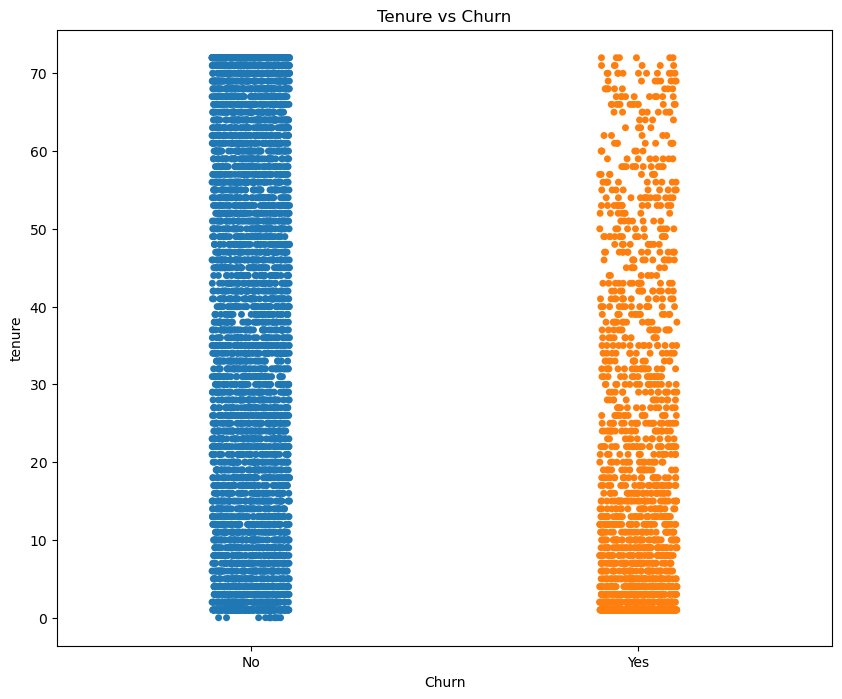

In [36]:
plt.figure(figsize=(10,8))
#make a stripplot
sns.stripplot(x="Churn",y="tenure",data=df_telco_cust);
plt.title("Tenure vs Churn");

- The stripplot above give a scatter view of the churn rate from the plot, people with higher tenure tend to stay. 
- People who just joined the company within 0 to 3 years tend to churn

## [Q4] Does having multiple lines affect churn rate?

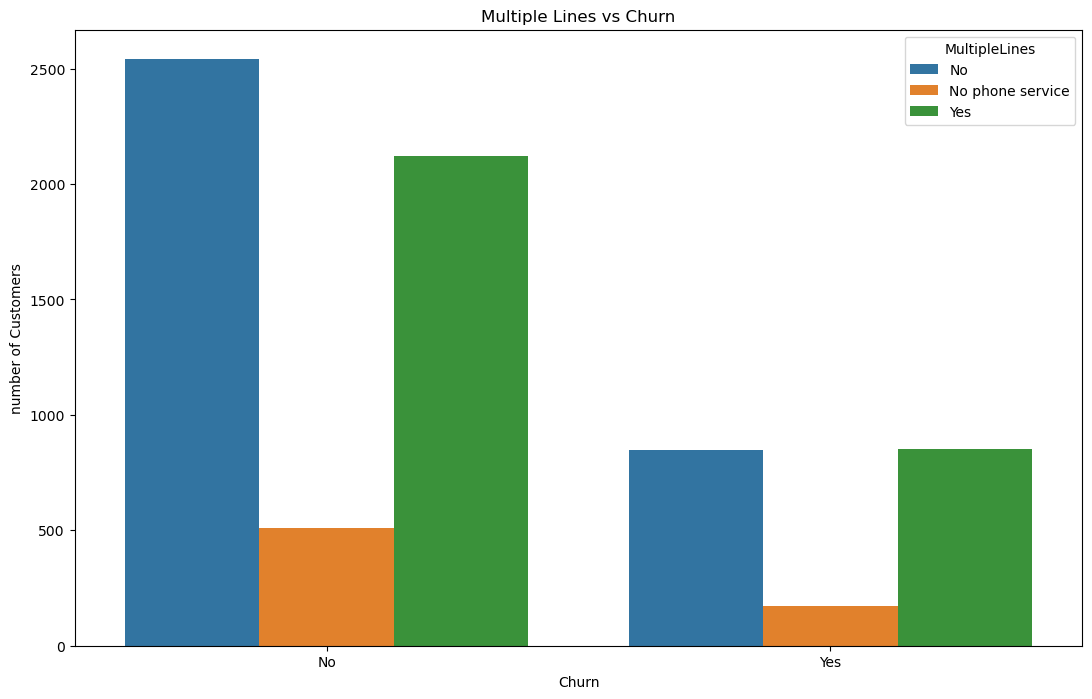

In [37]:
int_type=df_telco_cust.groupby(by=["MultipleLines","Churn"],as_index=False)["Churn"].value_counts(ascending=False)

plt.figure(figsize=(13,8))
sns.barplot(int_type["Churn"],int_type["count"],hue=int_type["MultipleLines"]);
plt.title("Multiple Lines vs Churn");
plt.ylabel("number of Customers");

### People with and without multiple lines tend to churn equally.

## [Q5] Are customers on month to month contracts more likely to churn compared to customers on long term contracts

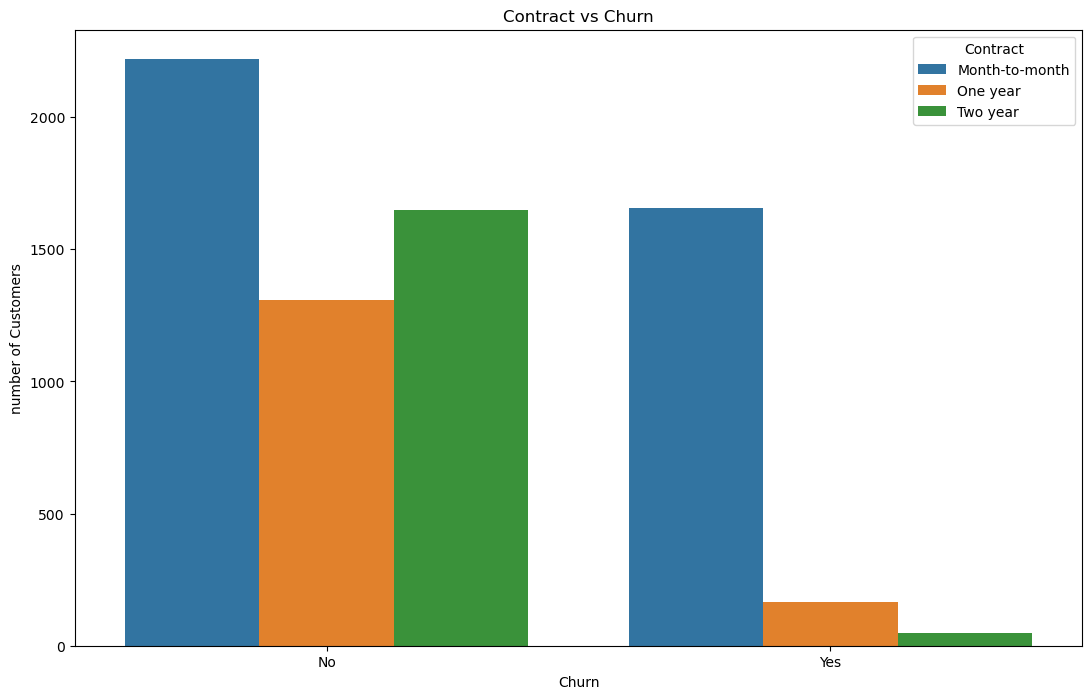

In [38]:
int_type=df_telco_cust.groupby(by=["Contract","Churn"],as_index=False)["Churn"].value_counts(ascending=False)

plt.figure(figsize=(13,8))
sns.barplot(int_type["Churn"],int_type["count"],hue=int_type["Contract"]);
plt.title("Contract vs Churn");
plt.ylabel("number of Customers");

- Most of the Customers who churn are on short term contracts.
- Overall most of the customers are on short term contracts and they also seem to churn the most.

## Insight:
From the insight gathered from the questions i.e
1. Most fiber optic customers tend to churn the most
2. People with shorter tenure (0 to 5 years) tend to churn the most
3. Customers on short term contracts(month to month) churn the most 

We will compare this 3 insights to really understand how they are connected.

## Hypotheses Testing [1]

H0: <b>The type of internet service does not affect churn rate<b>

H1: <b>customers with fiber optic  are more likely to churn compared to customers with Dsl or no internet service <b>

In [39]:
df_telco_cust

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,6840-RESVB,Male,0,Yes,Yes,24,Yes,Yes,DSL,Yes,...,Yes,Yes,Yes,Yes,One year,Yes,Mailed check,84.80,1990.50,No
7039,2234-XADUH,Female,0,Yes,Yes,72,Yes,Yes,Fiber optic,No,...,Yes,No,Yes,Yes,One year,Yes,Credit card (automatic),103.20,7362.90,No
7040,4801-JZAZL,Female,0,Yes,Yes,11,No,No phone service,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.60,346.45,No
7041,8361-LTMKD,Male,1,Yes,No,4,Yes,Yes,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Mailed check,74.40,306.60,Yes


In [40]:
#Create a dataframe containing internet service and churn
hyp1=df_telco_cust[["InternetService","Churn"]]
#replace str values with numeric values i.e encode
hyp1["InternetService"].replace({"DSL":1,"Fiber optic":2,"No":3},inplace=True)

hyp1["Churn"].replace({"No":0,"Yes":1},inplace=True)

#Do an anova Test
print('ANOVA Output:')

model = ols('Q("InternetService") ~ C(Churn)', data=hyp1).fit()
anova_result = sm.stats.anova_lm(model, typ=2)
print(anova_result)

ANOVA Output:
               sum_sq      df         F    PR(>F)
C(Churn)     8.573006     1.0  15.78232  0.000072
Residual  3824.693500  7041.0       NaN       NaN


- The Anova Test provides a P value of 0.000072

- Due to the small p value we reject our null hypothesis and accept the alternative hypothesis.

## Hypotheses Testing [2]

H0: <b>Paperless billing does not affect churn rate<b>

H1: <b>Customers with paperless billing are more likely to churn compared to customers who receive paper bill<b>

### Create a function that performs the hypothesis testing

In [41]:
#Create a dataframe containing internet service and churn
hyp1=df_telco_cust[["PaperlessBilling","Churn"]]
#replace str values with numeric values i.e encode
hyp1["PaperlessBilling"].replace({"Yes":1,"No":2},inplace=True)

hyp1["Churn"].replace({"No":0,"Yes":1},inplace=True)

#Do an anova Test
print('ANOVA Output:')

model = ols('Q("PaperlessBilling") ~ C(Churn)', data=hyp1).fit()
anova_result = sm.stats.anova_lm(model, typ=2)
print(anova_result)

ANOVA Output:
               sum_sq      df           F        PR(>F)
C(Churn)    62.586239     1.0  268.985218  2.356554e-59
Residual  1638.267375  7041.0         NaN           NaN


## F_stat and p_value
The code below computes the one-way ANOVA F-test between two variables PaperlessBilling and Churn in the hyp1 dataframe using the f_oneway() function from the scipy.stats module. 

The F-test is a statistical test that compares the variance between groups with the variance within groups to determine if there is a statistically significant difference in means between the groups. 

The function returns the F-statistic and the p-value. The F-statistic is a measure of the ratio of the variance between the groups to the variance within the groups, and the p-value is the probability of obtaining a test statistic as extreme as the one observed, assuming that the null hypothesis is true (i.e., there is no difference in means between the groups). The lower the p-value, the stronger the evidence against the null hypothesis.

In [42]:
f_stat, pvalue = stats.f_oneway(hyp1['PaperlessBilling'],hyp1['Churn'])

print('F_statistic: ',f_stat,'  ', 'p_value: ',pvalue)

F_statistic:  21057.74476923476    p_value:  0.0


With a p_value of 0.0, the above test shows that PaperlessBilling has an impact on churn

    - We therefore reject our null hypothesis

## Hypothesis Testing [3]
H0: <b>Tenure of a customer does not affect churn rate<b>

H1: <b>Customers who have been with the company for a longer tenure are less likely to churn compared to customers with shorter tenure<b>

## ANOVA Test

In [43]:
#Create a dataframe containing internet service and churn
hyp1=df_telco_cust[["tenure","Churn"]]


hyp1["Churn"].replace({"No":1,"Yes":2},inplace=True)

#Do an anova Test
print('ANOVA Output:')

model = ols('Q("tenure") ~ C(Churn)', data=hyp1).fit()
anova_result = sm.stats.anova_lm(model, typ=2)
print(anova_result)

ANOVA Output:
                sum_sq      df          F         PR(>F)
C(Churn)  5.269675e+05     1.0  997.26801  7.999058e-205
Residual  3.720542e+06  7041.0        NaN            NaN


## The Chi-Square
The code below computes the chi-square statistic, p-value, degrees of freedom, and expected frequencies for the contingency table given in the hyp1 dataframe using the chi2_contingency function from the scipy.stats module.

- The chi2_contingency function takes a contingency table as input and returns the following outputs:

    1. chi2_stat: the computed chi-square statistic
    2. pvalue: the p-value associated with the chi-square statistic
    3. dof: the degrees of freedom
    4. exp: the expected frequencies based on the null hypothesis of no association between the variables.

The code then prints the chi-square statistic and p-value.

In [44]:
#from scipy.stats import chi2, chi2_contingency
chi2_stat, pvalue, dof, exp = chi2_contingency(hyp1)

print("Chi-Square Statistics: \n")

print(f"chi_stat: {chi2_stat}\nP-value: {pvalue}")

Chi-Square Statistics: 

chi_stat: 29471.995700214382
P-value: 0.0


#### Once again both the chi-square test and ANOVA test has proven that we can ignore the null hypothesis and take H1: Customers who have been with the company for a longer tenure are less likely to churn compared to customers with shorter tenure.

# [10] Building of Machine Learning Models

## Use copy of df_telco_cust for Machine Learning

In [45]:
df_telco_cust_ML = df_telco_cust.copy()

In [46]:
df_telco_cust_ML

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,6840-RESVB,Male,0,Yes,Yes,24,Yes,Yes,DSL,Yes,...,Yes,Yes,Yes,Yes,One year,Yes,Mailed check,84.80,1990.50,No
7039,2234-XADUH,Female,0,Yes,Yes,72,Yes,Yes,Fiber optic,No,...,Yes,No,Yes,Yes,One year,Yes,Credit card (automatic),103.20,7362.90,No
7040,4801-JZAZL,Female,0,Yes,Yes,11,No,No phone service,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.60,346.45,No
7041,8361-LTMKD,Male,1,Yes,No,4,Yes,Yes,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Mailed check,74.40,306.60,Yes


## See distribution of Target (Churn)

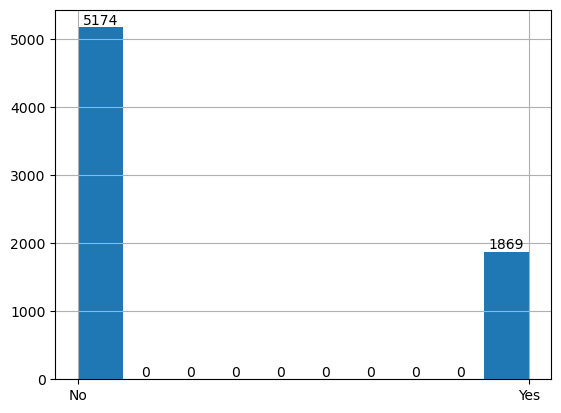

In [47]:
# Plot the histogram
ax = df_telco_cust_ML['Churn'].hist()

# Set the x-axis labels
ax.set_xticks([0, 1])
ax.set_xticklabels(['No', 'Yes'])

# Display the values on top of each bar
for rect in ax.patches:
    height = rect.get_height()
    ax.text(rect.get_x() + rect.get_width() / 2, height, f"{height:.0f}", ha='center', va='bottom')
    
# Show the plot
plt.show()


### Guess the Accuracy of Churn

In [48]:
# Percentage of Attrition accuracy by guesswork
(5174/(1869+5174))*100

73.4630129206304

#### Just by guessing, we can assume that the accuracy of predicting Churn is 73.46%

### The customerID is unnecessary in building our model so we shall drop it

In [49]:
# Drop customerID from the dataset
df_telco_cust_ML.drop('customerID', axis=1, inplace=True)

# Verify that the 'customerID' column has been dropped
df_telco_cust_ML

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,No
2,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,Male,0,Yes,Yes,24,Yes,Yes,DSL,Yes,No,Yes,Yes,Yes,Yes,One year,Yes,Mailed check,84.80,1990.50,No
7039,Female,0,Yes,Yes,72,Yes,Yes,Fiber optic,No,Yes,Yes,No,Yes,Yes,One year,Yes,Credit card (automatic),103.20,7362.90,No
7040,Female,0,Yes,Yes,11,No,No phone service,DSL,Yes,No,No,No,No,No,Month-to-month,Yes,Electronic check,29.60,346.45,No
7041,Male,1,Yes,No,4,Yes,Yes,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Mailed check,74.40,306.60,Yes


### See the dataset so far...

In [50]:
df_telco_cust_ML.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7043 entries, 0 to 7042
Data columns (total 20 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   gender            7043 non-null   object 
 1   SeniorCitizen     7043 non-null   int64  
 2   Partner           7043 non-null   object 
 3   Dependents        7043 non-null   object 
 4   tenure            7043 non-null   int64  
 5   PhoneService      7043 non-null   object 
 6   MultipleLines     7043 non-null   object 
 7   InternetService   7043 non-null   object 
 8   OnlineSecurity    7043 non-null   object 
 9   OnlineBackup      7043 non-null   object 
 10  DeviceProtection  7043 non-null   object 
 11  TechSupport       7043 non-null   object 
 12  StreamingTV       7043 non-null   object 
 13  StreamingMovies   7043 non-null   object 
 14  Contract          7043 non-null   object 
 15  PaperlessBilling  7043 non-null   object 
 16  PaymentMethod     7043 non-null   object 


In [51]:
print(df_telco_cust_ML.nunique())

gender                 2
SeniorCitizen          2
Partner                2
Dependents             2
tenure                73
PhoneService           2
MultipleLines          3
InternetService        3
OnlineSecurity         3
OnlineBackup           3
DeviceProtection       3
TechSupport            3
StreamingTV            3
StreamingMovies        3
Contract               3
PaperlessBilling       2
PaymentMethod          4
MonthlyCharges      1585
TotalCharges        6531
Churn                  2
dtype: int64


# [11] Feature Encoding and Engineering

## Encode Churn to Boolean

In [52]:
df_telco_cust_ML.Churn.replace(('Yes', 'No'), (1, 0), inplace=True)

# Building the pipeline
The code below is preparing the data for a machine learning model using pipelines and transformers. Each line of the code is explained below:

1. categorical_features = ['gender', 'SeniorCitizen', 'Partner', 'Dependents', 'PhoneService', 'MultipleLines', 'InternetService', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling', 'PaymentMethod']: This line defines the categorical features of the dataset that need to be preprocessed.

2. numeric_features = ['tenure', 'MonthlyCharges', 'TotalCharges']: This line defines the numerical features of the dataset that need to be preprocessed.

3. This code creates a preprocessing pipeline for categorical data. The pipeline consists of two steps:
    - The first step is an imputer, which fills in any missing values in the categorical data using the most frequent value in each column. This is specified by setting the strategy parameter of the SimpleImputer class to 'most_frequent'.

    - The second step is a one-hot encoder, which converts the categorical features into binary vectors. The drop parameter of the OneHotEncoder class is set to 'first', which drops the first category of each feature to avoid multicollinearity. The sparse parameter is set to False to return a dense matrix instead of a sparse matrix.

4. numeric_transformer = Pipeline(steps=[('imputer', SimpleImputer(strategy='mean')), ('scaler', StandardScaler())]): This line defines a pipeline for preprocessing the numerical features. The pipeline first imputes missing values with the mean of the column and then scales the numerical data.

5. preprocessor = ColumnTransformer(transformers=[('num', numeric_transformer, numeric_features), ('cat', categorical_transformer, categorical_features)]): This line defines a column transformer that applies the preprocessing pipelines to the numerical and categorical features separately.

6. pipeline = Pipeline(steps=[('preprocessor', preprocessor)]): This line defines the final pipeline that applies the preprocessing transformers to the data. It first applies the preprocessor defined in step 5 to transform the data, then applies the machine learning algorithm.

In [53]:
# Define which columns are categorical and which are numerical
categorical_features = ['gender', 'SeniorCitizen', 'Partner', 'Dependents', 'PhoneService', 'MultipleLines', 'InternetService',
                        'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies',
                        'Contract', 'PaperlessBilling', 'PaymentMethod']
numeric_features = ['tenure', 'MonthlyCharges', 'TotalCharges']

# Create the preprocessing pipelines for the categorical data
categorical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='most_frequent')),
    ('onehot', OneHotEncoder(drop='first', sparse=False))])

# Create the preprocessing pipelines for the numerical data
numeric_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='mean')),
    ('scaler', StandardScaler())])

# Combine the preprocessing pipelines using ColumnTransformer
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numeric_features),
        ('cat', categorical_transformer, categorical_features)])

# Define the final pipeline
pipeline = Pipeline(steps=[('preprocessor', preprocessor)])

In [54]:
df_telco_cust_ML

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,0
1,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,0
2,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,1
3,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,0
4,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,Male,0,Yes,Yes,24,Yes,Yes,DSL,Yes,No,Yes,Yes,Yes,Yes,One year,Yes,Mailed check,84.80,1990.50,0
7039,Female,0,Yes,Yes,72,Yes,Yes,Fiber optic,No,Yes,Yes,No,Yes,Yes,One year,Yes,Credit card (automatic),103.20,7362.90,0
7040,Female,0,Yes,Yes,11,No,No phone service,DSL,Yes,No,No,No,No,No,Month-to-month,Yes,Electronic check,29.60,346.45,0
7041,Male,1,Yes,No,4,Yes,Yes,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Mailed check,74.40,306.60,1


## Split the dataset into training and evaluation sets:

- The code below is splitting the data in df_telco_cust_ML into X and y components.

- X contains all the columns in df_telco_cust_ML except the Churn column which is the target variable.
- y contains only the Churn column.
- Then it uses train_test_split function from sklearn.model_selection module to split the X and y data into training and evaluation datasets.

- X_train and y_train contain 80% of the data and are used to train the machine learning model.
- X_eval and y_eval contain 20% of the data and are used to evaluate the performance of the trained model.

- The test_size argument specifies the proportion of the data to be used as the evaluation dataset, and random_state argument is used to initialize the internal random number generator, so that the split will be the same every time the code is run.

In [55]:
# Split data in to X and y components
X = df_telco_cust_ML.drop('Churn', axis=1)
y = df_telco_cust_ML['Churn']

# Split the data into 80% train, and 20% evaluation data
X_train, X_eval, y_train, y_eval = train_test_split(X,y, test_size=0.2, random_state=42, stratify = y)

### The shapes of  train and  eval data after splitting

In [56]:
X_train.shape, y_train.shape, X_eval.shape, y_eval.shape

((5634, 19), (5634,), (1409, 19), (1409,))

## Fit the Pipeline into X_train


In [57]:
# Fit the pipeline on the training data
pipeline.fit(X_train)

# Transform the training and evaluation data using the pipeline
X_train_transformed = pipeline.transform(X_train)
X_eval_transformed = pipeline.transform(X_eval)

## Change the transformed X_train and X_eval to dataframes with the same column names


In [58]:
# Get the column names after preprocessing
num_feature_names = preprocessor.transformers_[0][2]
cat_feature_names = preprocessor.named_transformers_['cat'].named_steps['onehot'].get_feature_names(categorical_features)

# Combine the numerical and categorical feature names
feature_names = list(num_feature_names) + list(cat_feature_names)

# Create dataframes for the transformed data with the original column names
X_train_transformed_df = pd.DataFrame(X_train_transformed, columns=feature_names)
X_eval_transformed_df = pd.DataFrame(X_eval_transformed, columns=feature_names)

### View the transformed X_train

In [59]:
X_train_transformed_df

,tenure,MonthlyCharges,TotalCharges,gender_Male,SeniorCitizen_1,Partner_Yes,Dependents_Yes,PhoneService_Yes,MultipleLines_No phone service,MultipleLines_Yes,...,StreamingTV_No internet service,StreamingTV_Yes,StreamingMovies_No internet service,StreamingMovies_Yes,Contract_One year,Contract_Two year,PaperlessBilling_Yes,PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
0,0.102371,-0.521976,-0.263871,1.0,0.0,0.0,0.0,0.0,1.0,0.0,...,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
1,-0.711743,0.337478,-0.505423,1.0,0.0,1.0,1.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
2,-0.793155,-0.809013,-0.751850,1.0,0.0,1.0,1.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
3,-0.263980,0.284384,-0.174271,0.0,0.0,1.0,0.0,1.0,0.0,0.0,...,0.0,1.0,0.0,1.0,0.0,1.0,1.0,1.0,0.0,0.0
4,-1.281624,-0.676279,-0.991514,1.0,0.0,1.0,1.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5629,1.567778,1.470695,2.373424,0.0,0.0,1.0,0.0,1.0,0.0,1.0,...,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0
5630,-1.240918,-0.626504,-0.975794,1.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5631,-0.304686,1.256662,0.157035,0.0,1.0,0.0,0.0,1.0,0.0,1.0,...,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0
5632,-0.345392,-1.477661,-0.799076,0.0,0.0,1.0,0.0,1.0,0.0,0.0,...,1.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0


### View the transforemed X_eval

In [60]:
X_eval_transformed_df

,tenure,MonthlyCharges,TotalCharges,gender_Male,SeniorCitizen_1,Partner_Yes,Dependents_Yes,PhoneService_Yes,MultipleLines_No phone service,MultipleLines_Yes,...,StreamingTV_No internet service,StreamingTV_Yes,StreamingMovies_No internet service,StreamingMovies_Yes,Contract_One year,Contract_Two year,PaperlessBilling_Yes,PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
0,1.608483,1.629976,2.707365,1.0,0.0,1.0,1.0,1.0,0.0,1.0,...,0.0,1.0,0.0,1.0,0.0,1.0,1.0,1.0,0.0,0.0
1,-0.996684,1.168725,-0.612126,0.0,1.0,0.0,0.0,1.0,0.0,1.0,...,0.0,1.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0
2,0.346606,0.445324,0.398982,0.0,0.0,1.0,1.0,1.0,0.0,1.0,...,0.0,1.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0
3,-0.589626,0.440347,-0.366139,1.0,0.0,1.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
4,1.608483,0.588013,1.588148,0.0,0.0,1.0,0.0,1.0,0.0,1.0,...,0.0,1.0,0.0,1.0,0.0,1.0,1.0,1.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1404,0.672252,0.738999,0.896841,0.0,0.0,1.0,1.0,1.0,0.0,0.0,...,0.0,1.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,1.0
1405,-0.182569,-1.480980,-0.796814,1.0,0.0,1.0,1.0,1.0,0.0,0.0,...,1.0,0.0,1.0,0.0,0.0,1.0,1.0,1.0,0.0,0.0
1406,-1.118801,-1.469365,-0.969998,1.0,0.0,0.0,0.0,1.0,0.0,0.0,...,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1407,0.957192,-1.500890,-0.549180,0.0,0.0,0.0,0.0,1.0,0.0,0.0,...,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0


### View y_train

In [61]:
y_train

3738    0
3151    0
4860    0
3867    0
3810    0
       ..
6303    0
6227    1
4673    1
2710    0
5639    0
Name: Churn, Length: 5634, dtype: int64

### View y_eval

In [62]:
y_eval

437     0
2280    0
2235    0
4460    0
3761    0
       ..
5143    0
4439    0
3857    0
4758    0
5613    0
Name: Churn, Length: 1409, dtype: int64

# [12] Machine Learning Models to train:
We shall train 8 Classification Models below and pick the 3 best performing models for further tuning:
1. Logistic Regression
2. K-Nearest Neighbors
3. Decision Tree
4. Support Vector Machine (Linear Kernel)
5. Support Vector Machine (RBF Kernel)
6. Neural Network
7. Random Forest
8. Gradient Boosting

## Evaluation and Comparison of Multiple Classification Models with ROC Curve Analysis.
**Below is a detailed explanation of each line of code:**
1. pipeline = Pipeline([('preprocessor', preprocessor), ('clf', None)]): 
    - This line creates a pipeline object using the Pipeline class from scikit-learn. The pipeline consists of two steps: the "preprocessor" step, which is set to preprocessor (that was defined earlier), and the "clf" step, which is initially set to None. The "preprocessor" step is responsible for the preprocessing and feature engineering, while the "clf" step represents the classification model.

2. models = {...}: 
    - This code creates a dictionary called models that contains the names of different classification models as keys and instances of the corresponding model classes as values. Each model is initialized with its default hyperparameters.

3. def evaluate_models(pipeline, models, X, y, scoring):: 
    - This line defines a function called evaluate_models that takes the pipeline, models, input features X, target variable y, and a list of evaluation metrics scoring as inputs.

4. for name, clf in models.items():: 
    - This line starts a loop that iterates over the items (name and classifier) in the models dictionary.

5. pipeline.set_params(clf=clf): 
    - This line updates the "clf" step of the pipeline with the current classifier clf.

6. cv_results = cross_validate(pipeline, X, y, cv=5, scoring=scoring): 
    - This line performs cross-validation using the cross_validate function from scikit-learn. It evaluates the pipeline on the input features X and target variable y using 5-fold cross-validation and calculates the specified evaluation metrics given by scoring.

7. mean_scores = {metric: round(scores.mean(), 4) for metric, scores in cv_results.items()}: 
    - This line calculates the mean scores for each evaluation metric by iterating over the cv_results dictionary. It creates a new dictionary called mean_scores, where the keys are the evaluation metrics and the values are the corresponding mean scores rounded to 3 decimal places.

8. print(f'{name}:\n{mean_scores}\n'): 
    - This line prints the name of the current model and its mean scores for the evaluation metrics.

9. if hasattr(clf, 'predict_proba'):: 
    - This condition checks if the current classifier clf has a predict_proba method, which is used to obtain class probabilities.

10. y_prob = cross_val_predict(pipeline, X, y, cv=5, method='predict_proba')[:, 1]: 
    - If the classifier has predict_proba, this line uses the cross_val_predict function to perform cross-validation and obtain class probabilities. The probabilities for the positive class are selected by indexing [:, 1].

11. else:: 
    - This block is executed if the classifier does not have a predict_proba method.

12. if hasattr(clf, 'decision_function'):: 
    - This condition checks if the current classifier clf has a decision_function method, which is used to obtain decision scores.

13. y_scores = cross_val_predict(pipeline, X, y, cv=5, method='decision_function'): 
    - If the classifier has decision_function, this line uses the cross_val_predict function to perform cross-validation and obtain decision scores.

14. elif hasattr(clf, 'predict_log_proba'):: 
    - This condition checks if the current classifier clf has a predict_log_proba method, which is used to obtain log probabilities.

15. y_scores = cross_val_predict(pipeline, X, y, cv=5, method='predict_log_proba'); y_scores = y_scores[:, 1]: 
    - If the classifier does not have a decision_function method, the code checks if it has a predict_log_proba method. If it does, the cross_val_predict function is used to perform cross-validation and obtain the log probabilities. The positive class probabilities are selected by indexing [:, 1].

16. else: raise ValueError(f'Model {name} does not have a suitable method for obtaining decision scores.'): 
    - This line is executed if the classifier does not have a suitable method (decision_function or predict_log_proba) for obtaining decision scores. It raises a ValueError with a message stating that the model does not have a suitable method.

17. fpr, tpr, _ = roc_curve(y, y_prob): 
    - This line calculates the false positive rate (fpr) and true positive rate (tpr) using the roc_curve function from scikit-learn. It takes the true labels y and the predicted probabilities y_prob as inputs.

18. roc_auc = roc_auc_score(y, y_prob): 
    - This line calculates the area under the ROC curve (roc_auc) using the roc_auc_score function from scikit-learn. It takes the true labels y and the predicted probabilities y_prob as inputs.

19. plt.plot(fpr, tpr, label=f'{name} (AUC = {roc_auc:.4f})'): 
    - This line plots the ROC curve for the current model, with the false positive rate on the x-axis (fpr) and the true positive rate on the y-axis (tpr). The label for the plot includes the model name and the calculated AUC score.

20. The remaining lines of code plot the diagonal line ([0, 1], [0, 1]), set the x-label, y-label, and title for the plot, display the legend, and show the plot.

21. scoring = ['accuracy', 'precision_macro', 'recall_macro', 'f1_macro', 'roc_auc']: 
    - This line defines a list of evaluation metrics that will be used to evaluate the models.

22. evaluate_models(pipeline, models, X_train, y_train, scoring): 
    - This line calls the evaluate_models function and passes the pipeline, models, training data X_train and y_train, and the list of evaluation metrics scoring as arguments. It evaluates each model, prints the mean scores, and plots the ROC curves for each model.

Logistic Regression:
{'fit_time': 0.3392, 'score_time': 0.068, 'test_accuracy': 0.8044, 'test_precision_macro': 0.7522, 'test_recall_macro': 0.7224, 'test_f1_macro': 0.7343, 'test_roc_auc': 0.8456}

K-Nearest Neighbors:
{'fit_time': 0.1245, 'score_time': 0.927, 'test_accuracy': 0.7636, 'test_precision_macro': 0.6954, 'test_recall_macro': 0.688, 'test_f1_macro': 0.6913, 'test_roc_auc': 0.7815}

Decision Tree:
{'fit_time': 0.1675, 'score_time': 0.0857, 'test_accuracy': 0.7259, 'test_precision_macro': 0.6523, 'test_recall_macro': 0.6575, 'test_f1_macro': 0.6546, 'test_roc_auc': 0.6575}

Support Vector Machine (Linear Kernel):
{'fit_time': 0.6536, 'score_time': 0.1065, 'test_accuracy': 0.8014, 'test_precision_macro': 0.7487, 'test_recall_macro': 0.7144, 'test_f1_macro': 0.7275, 'test_roc_auc': 0.8421}

Support Vector Machine (RBF Kernel):
{'fit_time': 21.4275, 'score_time': 2.5299, 'test_accuracy': 0.8032, 'test_precision_macro': 0.756, 'test_recall_macro': 0.7034, 'test_f1_macro': 0.7209,

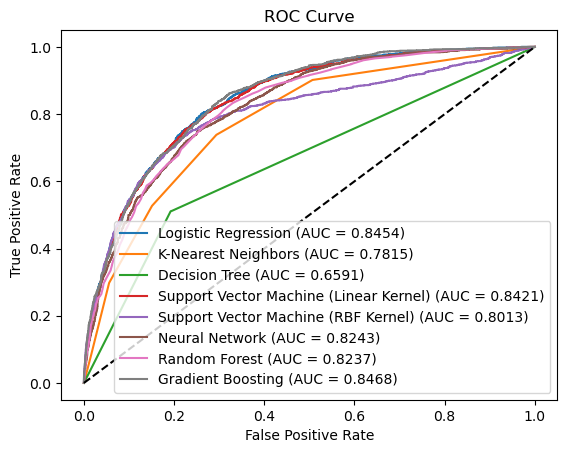

In [63]:
# Define pipeline for preprocessing and modeling
pipeline = Pipeline([
    ('preprocessor', preprocessor),
    ('clf', None)
])

# Create dictionary of models to evaluate
models = {
    'Logistic Regression': LogisticRegression(),
    'K-Nearest Neighbors': KNeighborsClassifier(),
    'Decision Tree': DecisionTreeClassifier(),
    'Support Vector Machine (Linear Kernel)': LinearSVC(),
    'Support Vector Machine (RBF Kernel)': SVC(probability=True),  # Set probability=True to enable predict_proba
    'Neural Network': MLPClassifier(),
    'Random Forest': RandomForestClassifier(),
    'Gradient Boosting': GradientBoostingClassifier()
}

# Define function to evaluate models
def evaluate_models(pipeline, models, X_train, y_train, scoring):
    for name, clf in models.items():
        pipeline.set_params(clf=clf)
        cv_results = cross_validate(pipeline, X_train, y_train, cv=5, scoring=scoring)
        mean_scores = {metric: round(scores.mean(), 4) for metric, scores in cv_results.items()}
        print(f'{name}:\n{mean_scores}\n')

        if hasattr(clf, 'predict_proba'):
            y_prob = cross_val_predict(pipeline, X_train, y_train, cv=5, method='predict_proba')[:, 1]
        else:
            # For models without predict_proba, use decision_function or predict_log_proba
            if hasattr(clf, 'decision_function'):
                y_scores = cross_val_predict(pipeline, X_train, y_train, cv=5, method='decision_function')
            elif hasattr(clf, 'predict_log_proba'):
                y_scores = cross_val_predict(pipeline, X_train, y_train, cv=5, method='predict_log_proba')
                y_scores = y_scores[:, 1]  # Select positive class probabilities
            else:
                raise ValueError(f'Model {name} does not have a suitable method for obtaining decision scores.')

            y_prob = y_scores

        fpr, tpr, _ = roc_curve(y_train, y_prob)
        roc_auc = roc_auc_score(y_train, y_prob)
        plt.plot(fpr, tpr, label=f'{name} (AUC = {roc_auc:.4f})')

    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('ROC Curve')
    plt.legend(loc='lower right')
    plt.show()

# Define list of evaluation metrics
scoring = ['accuracy', 'precision_macro', 'recall_macro', 'f1_macro', 'roc_auc']

# Call function to evaluate models
evaluate_models(pipeline, models, X_train, y_train, scoring)

## Create a matrix table to display the evaluation metrics for each model

The code below creates a DataFrame named df_results that contains the evaluation results for different models. Let's break down the code step by step:

1. The results dictionary is defined, which stores the evaluation metrics for each model. It has the following keys:
    - 'Model': A list of model names.
    - 'Accuracy': A list of accuracy scores for each model.
    - 'Precision (macro)': A list of macro-averaged precision scores for each model.
    - 'Recall (macro)': A list of macro-averaged recall scores for each model.
    - 'F1-score (macro)': A list of macro-averaged F1 scores for each model.
    - 'ROC AUC': A list of ROC AUC scores for each model.

2. The pd.DataFrame() function is used to create a DataFrame df_results from the results dictionary. Each key in the dictionary becomes a column in the DataFrame, and the corresponding values in the lists become the column values.

3. Finally, the print(df_results) statement displays the matrix table, which shows the evaluation metrics for each model. Each row represents a model, and each column represents an evaluation metric.

In [64]:
# Define the results dictionary
results = {
    'Model': [
        'Logistic Regression',
        'K-Nearest Neighbors',
        'Decision Tree',
        'Support Vector Machine (Linear Kernel)',
        'Support Vector Machine (RBF Kernel)',
        'Neural Network',
        'Random Forest',
        'Gradient Boosting'
    ],
    'Accuracy': [0.8044, 0.7636, 0.7252, 0.8014, 0.8032, 0.7886, 0.7856, 0.8032],
    'Precision (macro)': [0.7522, 0.6954, 0.6513, 0.7487, 0.756, 0.7296, 0.7262, 0.7535],
    'Recall (macro)': [0.7224, 0.688, 0.6562, 0.7144, 0.7034, 0.7004, 0.6876, 0.7101],
    'F1-score (macro)': [0.7343, 0.6913, 0.6534, 0.7275, 0.7209, 0.711, 0.7012, 0.7256],
    'ROC AUC': [0.8456, 0.7815, 0.6565, 0.8421, 0.8036, 0.8258, 0.8232, 0.847]
}

# Create the dataframe
df_results = pd.DataFrame(results)

# Display the results
df_results

,Model,Accuracy,Precision (macro),Recall (macro),F1-score (macro),ROC AUC
0,Logistic Regression,0.8044,0.7522,0.7224,0.7343,0.8456
1,K-Nearest Neighbors,0.7636,0.6954,0.6880,0.6913,0.7815
2,Decision Tree,0.7252,0.6513,0.6562,0.6534,0.6565
3,Support Vector Machine (Linear Kernel),0.8014,0.7487,0.7144,0.7275,0.8421
4,Support Vector Machine (RBF Kernel),0.8032,0.7560,0.7034,0.7209,0.8036
5,Neural Network,0.7886,0.7296,0.7004,0.7110,0.8258
6,Random Forest,0.7856,0.7262,0.6876,0.7012,0.8232
7,Gradient Boosting,0.8032,0.7535,0.7101,0.7256,0.8470


## Visualization of the Metrics

The visualize_results function takes a DataFrame df_results containing performance metrics for different models and visualizes the results.

Here's a summary of what the code does:

1. Sorts the df_results DataFrame by the highest accuracy score in descending order and assigns the sorted DataFrame to df_results_sorted.
2. Creates a bar plot of the accuracy scores for each model, with model names on the y-axis and accuracy on the x-axis. The plot is displayed.
3. Sorts the df_results DataFrame by the highest precision (macro) score in descending order and assigns the sorted DataFrame to df_results_sorted.
4. Creates a bar plot of the precision (macro) scores for each model, with model names on the y-axis and precision (macro) on the x-axis. The plot is displayed.
5. Sorts the df_results DataFrame by the highest recall (macro) score in descending order and assigns the sorted DataFrame to df_results_sorted.
6. Creates a bar plot of the recall (macro) scores for each model, with model names on the y-axis and recall (macro) on the x-axis. The plot is displayed.
7. Sorts the df_results DataFrame by the highest F1-score (macro) score in descending order and assigns the sorted DataFrame to df_results_sorted.
8. Creates a bar plot of the F1-score (macro) scores for each model, with model names on the y-axis and F1-score (macro) on the x-axis. The plot is displayed.
9. Sorts the df_results DataFrame by the highest ROC AUC score in descending order and assigns the sorted DataFrame to df_results_sorted.
10. Creates a bar plot of the ROC AUC scores for each model, with model names on the y-axis and ROC AUC on the x-axis. The plot is displayed.


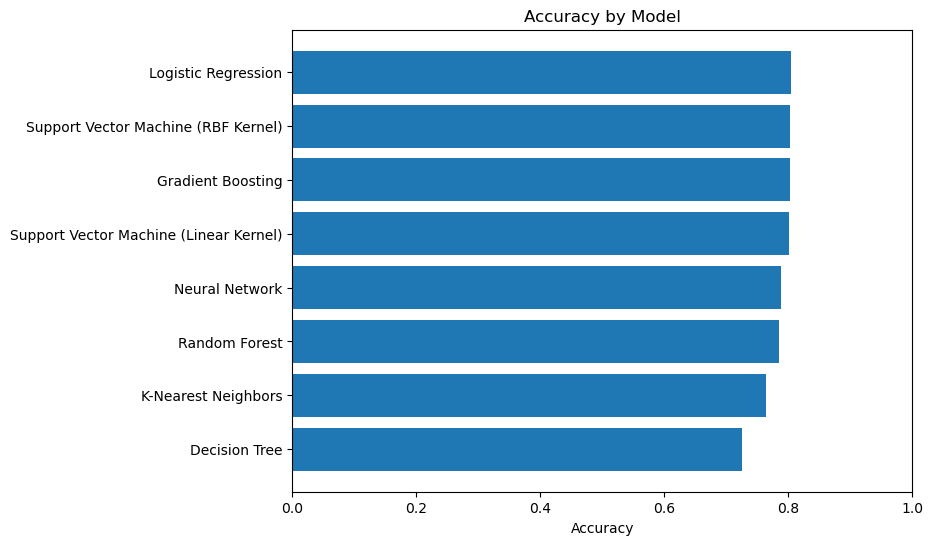

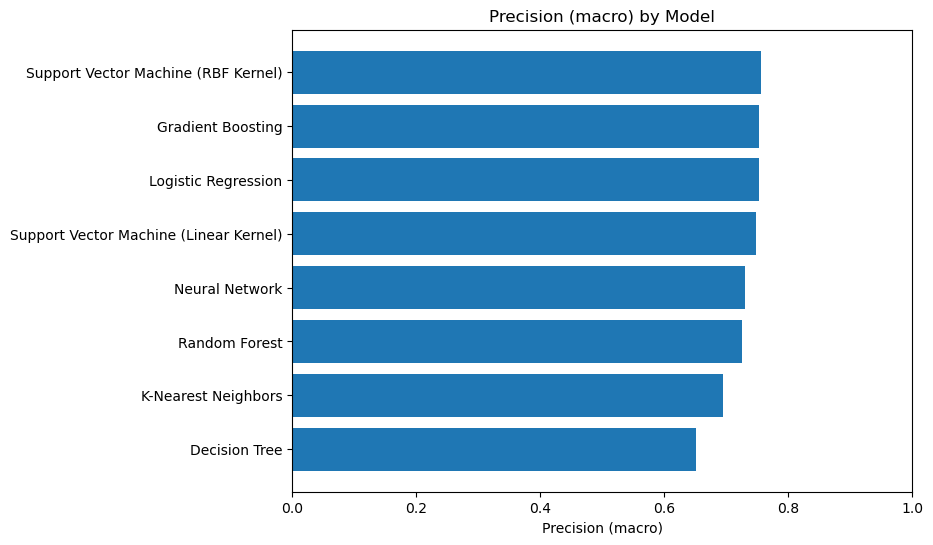

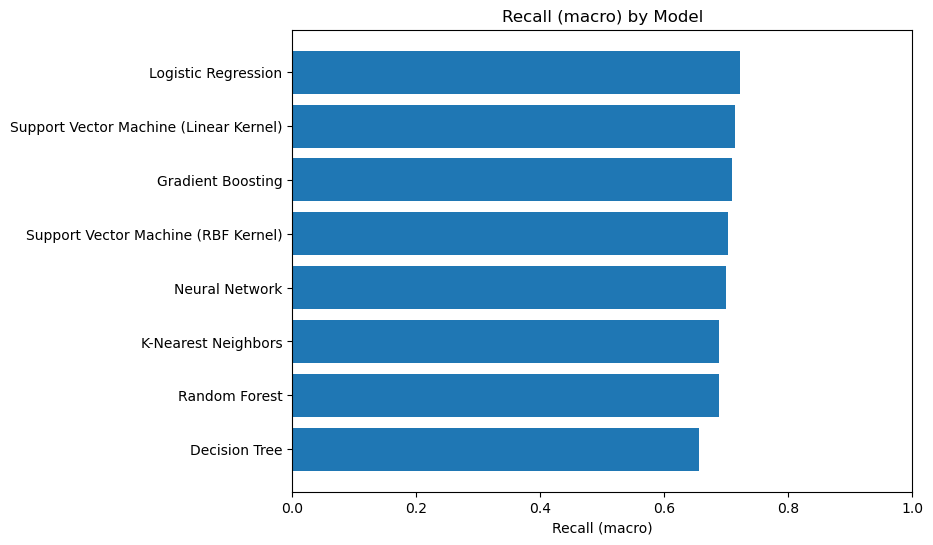

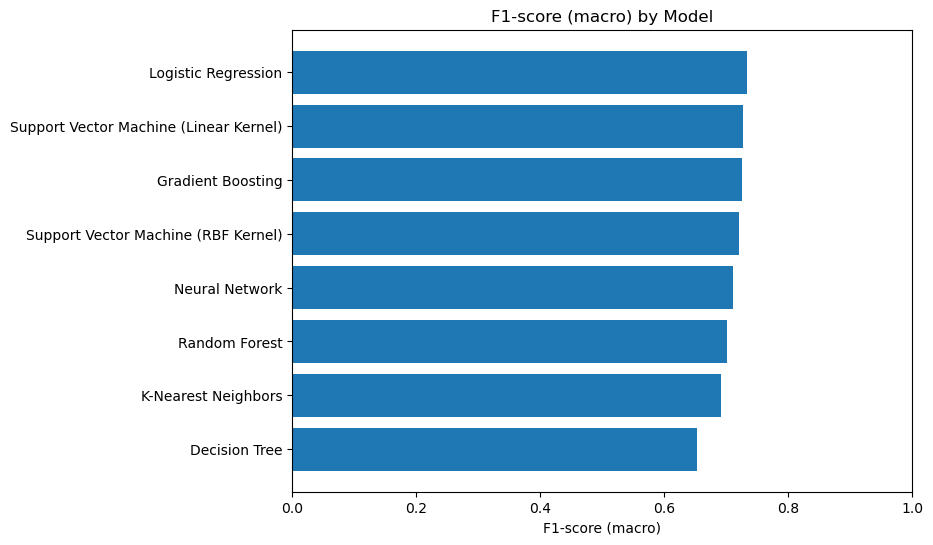

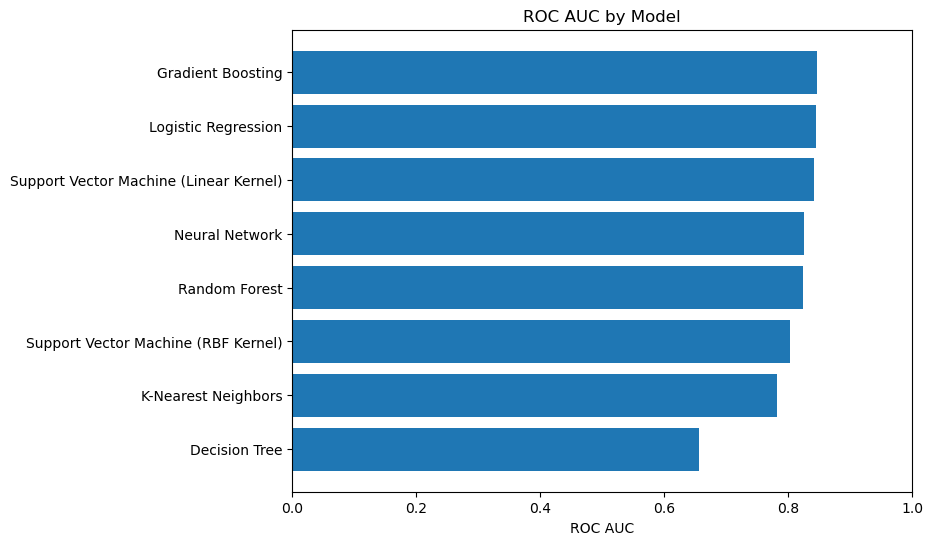

In [65]:
def visualize_results(df_results):
    # Sort the DataFrame by the highest score in descending order for each metric
    df_results_sorted = df_results.sort_values(by='Accuracy', ascending=False)[::-1]

    # Set the figure size
    plt.figure(figsize=(8, 6))

    # Plot the accuracy
    plt.barh(df_results_sorted['Model'], df_results_sorted['Accuracy'])
    plt.xlim(0.0, 1.0)  # Set the x-axis limits
    plt.xlabel('Accuracy')
    plt.title('Accuracy by Model')

    plt.show()

    # Sort the DataFrame by the highest score in descending order for each metric
    df_results_sorted = df_results.sort_values(by='Precision (macro)', ascending=False)[::-1]

    # Set the figure size
    plt.figure(figsize=(8, 6))

    # Plot the precision (macro)
    plt.barh(df_results_sorted['Model'], df_results_sorted['Precision (macro)'])
    plt.xlim(0.0, 1.0)  # Set the x-axis limits
    plt.xlabel('Precision (macro)')
    plt.title('Precision (macro) by Model')

    plt.show()

    # Sort the DataFrame by the highest score in descending order for each metric
    df_results_sorted = df_results.sort_values(by='Recall (macro)', ascending=False)[::-1]

    # Set the figure size
    plt.figure(figsize=(8, 6))

    # Plot the recall (macro)
    plt.barh(df_results_sorted['Model'], df_results_sorted['Recall (macro)'])
    plt.xlim(0.0, 1.0)  # Set the x-axis limits
    plt.xlabel('Recall (macro)')
    plt.title('Recall (macro) by Model')

    plt.show()

    # Sort the DataFrame by the highest score in descending order for each metric
    df_results_sorted = df_results.sort_values(by='F1-score (macro)', ascending=False)[::-1]

    # Set the figure size
    plt.figure(figsize=(8, 6))

    # Plot the F1-score (macro)
    plt.barh(df_results_sorted['Model'], df_results_sorted['F1-score (macro)'])
    plt.xlim(0.0, 1.0)  # Set the x-axis limits
    plt.xlabel('F1-score (macro)')
    plt.title('F1-score (macro) by Model')

    plt.show()

    # Sort the DataFrame by the highest score in descending order for each metric
    df_results_sorted = df_results.sort_values(by='ROC AUC', ascending=False)[::-1]

    # Set the figure size
    plt.figure(figsize=(8, 6))

    # Plot the ROC AUC
    plt.barh(df_results_sorted['Model'], df_results_sorted['ROC AUC'])
    plt.xlim(0.0, 1.0)  # Set the x-axis limits
    plt.xlabel('ROC AUC')
    plt.title('ROC AUC by Model')

    # Display the plot
    plt.show()

    
# Call the visualize_results function
visualize_results(df_results)

## Top 4 Models in terms of performance:
**Upon reviewing the results, the top three performing models in ranking from highest to lowest based on the provided metrics are:**

1. Here are the reasons why **Gradient Boosting** is ranked first among the top three models:

    - **High Accuracy:** Gradient Boosting has the highest accuracy among the top three models. Accuracy measures the proportion of correctly predicted instances, making it an important metric for evaluating classification models. A high accuracy score indicates that the model performs well in predicting the churn status of customers.

    - **High Precision (macro):** Precision is the ability of a model to correctly identify the positive class (churn) instances. The precision (macro) metric calculates the average precision across all classes. A high precision score indicates that the model has a low false positive rate, meaning it correctly identifies churned customers without falsely labeling non-churned customers as churned.

    - **High ROC AUC:** ROC AUC (Receiver Operating Characteristic Area Under the Curve) is a metric that measures the model's ability to distinguish between positive and negative classes. A high ROC AUC score indicates that the model has a good balance between true positive rate and false positive rate. In this case, Gradient Boosting has the highest ROC AUC score among the top three models, suggesting it has good discriminatory power to differentiate between churned and non-churned customers.

*These factors contribute to the overall performance of Gradient Boosting, making it the top-ranked model among the three based on the provided metrics.*

2. **Logistic Regression** (No. 2):

    - **High Precision (macro):** Logistic Regression has a relatively high precision (macro) score. This indicates that it effectively identifies churned customers while minimizing false positive predictions.

    - **High Recall (macro):** Recall (macro) measures the model's ability to correctly identify positive class instances. Logistic Regression demonstrates a reasonably high recall score, suggesting that it captures a good proportion of actual churned customers.

    - **High F1-score (macro):** The F1-score (macro) is the harmonic mean of precision and recall. It provides a balanced evaluation of a model's performance. Logistic Regression achieves a competitive F1-score (macro), indicating a good balance between precision and recall.
    
3. **Support Vector Machine (Linear Kernel)** (No. 3):

    - **High Accuracy:** Support Vector Machine (Linear Kernel) achieves a high accuracy score, indicating its overall predictive capability in determining churned customers.

    - **Moderate Precision (macro):** The precision (macro) score for Support Vector Machine (Linear Kernel) is relatively good, implying that it effectively identifies churned customers with limited false positive predictions.

    - **Moderate Recall (macro):** Support Vector Machine (Linear Kernel) demonstrates a moderate recall (macro) score, suggesting that it captures a reasonable proportion of actual churned customers.
    
*While both Logistic Regression and Support Vector Machine (Linear Kernel) perform well across the metrics, the ranking is determined based on their collective performance. Logistic Regression edges out Support Vector Machine (Linear Kernel) due to slightly better precision and F1-score (macro) values. However, it's important to note that the ranking may vary depending on the specific dataset and evaluation metrics used.*

4. **Neural Network** (No.4):
    - Among the remaining models, Random ForestNeural Network has the highest accuracy and ROC AUC score, indicating that it performs better overall compared to the other models. However, it has a slightly lower precision, recall, and F1-score compared to the top three models, which is why it ranks fourth.

# Hyperparameter Tuning for Four chosen Models using Cross-Validation

The code below sets up the parameter grids for each model, performs hyperparameter tuning using grid search with cross-validation, and prints the best parameters and best accuracy for each model. Here are the steps:

1. gradient_boosting_params is a dictionary that specifies the hyperparameters and their corresponding values for the Gradient Boosting model. The hyperparameters being tuned here are learning_rate, n_estimators, and max_depth.

2. logistic_regression_params is a dictionary that specifies the hyperparameters and their corresponding values for the Logistic Regression model. The hyperparameters being tuned here are C (inverse of regularization strength) and solver (optimization algorithm).

3. svm_params is a dictionary that specifies the hyperparameters and their corresponding values for the Support Vector Machine (Linear Kernel) model. The hyperparameters being tuned here are C (inverse of regularization strength) and kernel (type of kernel function).

4. neural_network_params is a dictionary that specifies the hyperparameters and their corresponding values for the Neural Network model. The hyperparameters being tuned here are hidden_layer_sizes (sizes of the hidden layers), activation (activation function), and alpha (L2 regularization parameter).

5. The models dictionary contains the models to be tuned along with their respective parameter grids. Each key-value pair in the dictionary represents a model name and a tuple containing the model object and its corresponding parameter grid.

6. The for loop iterates over each model in the models dictionary. It extracts the model name, model object, and parameter grid using tuple unpacking.

7. Inside the loop, GridSearchCV is initialized with the model, parameter grid, and other parameters such as cv (number of cross-validation folds), scoring metric ('accuracy' in this case), and n_jobs (number of CPU cores to use for parallelization).

8. grid_search.fit(X_train_transformed_df, y_train) performs the grid search with cross-validation on the training data. It explores different combinations of hyperparameters for the specified model and evaluates their performance using cross-validation.

9. After the grid search is complete, the best parameters and best accuracy for the model are printed.

10. The loop continues for the remaining models, and the process is repeated.

In [66]:
# Set up the parameter grid for each model
gradient_boosting_params = {
    'learning_rate': [0.1, 0.01],
    'n_estimators': [100, 200, 300],
    'max_depth': [3, 4, 5]
}

logistic_regression_params = {
    'C': [0.1, 1, 10],
    'solver': ['liblinear', 'saga']
}

svm_params = {
    'C': [0.1, 1, 10],
    'kernel': ['linear']
}

neural_network_params = {
    'hidden_layer_sizes': [(100,), (100, 50)],
    'activation': ['relu', 'tanh'],
    'alpha': [0.0001, 0.001]
}

# Perform hyperparameter tuning with cross-validation for each model
models = {
    'Gradient Boosting': (GradientBoostingClassifier(), gradient_boosting_params),
    'Logistic Regression': (LogisticRegression(), logistic_regression_params),
    'Support Vector Machine (Linear Kernel)': (SVC(), svm_params),
    'Neural Network': (MLPClassifier(), neural_network_params)
}

for model_name, (model, params) in models.items():
    grid_search = GridSearchCV(model, params, cv=5, scoring=['accuracy', 'f1_macro'], refit='accuracy', n_jobs=-1)
    grid_search.fit(X_train_transformed_df, y_train)

    print(f"Best parameters for {model_name}:")
    print(grid_search.best_params_)
    print(f"Best accuracy for {model_name}: {grid_search.best_score_}\n")

    print(f"Best F1-score for {model_name}: {grid_search.cv_results_['mean_test_f1_macro'][grid_search.best_index_]}\n")

Best parameters for Gradient Boosting:
{'learning_rate': 0.1, 'max_depth': 3, 'n_estimators': 100}
Best accuracy for Gradient Boosting: 0.8031555505822686

Best F1-score for Gradient Boosting: 0.7256333006028381

Best parameters for Logistic Regression:
{'C': 1, 'solver': 'saga'}
Best accuracy for Logistic Regression: 0.8043996778570877

Best F1-score for Logistic Regression: 0.7343163675633029

Best parameters for Support Vector Machine (Linear Kernel):
{'C': 0.1, 'kernel': 'linear'}
Best accuracy for Support Vector Machine (Linear Kernel): 0.8001394796856113

Best F1-score for Support Vector Machine (Linear Kernel): 0.7275914797035837

Best parameters for Neural Network:
{'activation': 'tanh', 'alpha': 0.001, 'hidden_layer_sizes': (100,)}
Best accuracy for Neural Network: 0.8043988898362651

Best F1-score for Neural Network: 0.7317826440313808



## Matrix of these metrics and hyperparameters per model
The code below essentially creates a DataFrame to store the hyperparameters and metrics for each model and then populates the DataFrame with the corresponding values. Finally, it prints the DataFrame to display the results as explain below:

1. hyperparameters: A dictionary that contains the hyperparameters for each model. The keys are the model names, and the values are dictionaries of hyperparameter names and their corresponding values.

2. metrics: A dictionary that contains the evaluation metrics for each model. The keys are the model names, and the values are dictionaries of metric names (e.g., accuracy, f1_score) and their corresponding values.

3. results_df: Creates an empty DataFrame with columns to store the model, hyperparameters, and metrics.

4. Loop over each model in the hyperparameters dictionary:

    - a. Create a result_row dictionary to store the model name, hyperparameters, and metrics.

    - b. Populate the result_row dictionary with the model name and hyperparameters from the hyperparameters dictionary, using params.get() to retrieve the hyperparameter values or '-' if not present.

    - c. Retrieve the accuracy and f1-score from the metrics dictionary for the current model and add them to the result_row dictionary.

    - d. Append the result_row dictionary as a new row to the results_df DataFrame using append() and ignore_index=True.

5. Print the results_df DataFrame, which now contains the model names, hyperparameters, accuracy, and f1-score for each model. The DataFrame columns include 'Model', 'Learning Rate', 'Max Depth', 'N Estimators', 'C', 'Solver', 'Kernel', 'Activation', 'Alpha', 'Hidden Layer Sizes', 'Accuracy', and 'F1-score'.

In [67]:
# Define the hyperparameters and metrics
hyperparameters = {
    'Gradient Boosting': {'learning_rate': 0.1, 'max_depth': 3, 'n_estimators': 100},
    'Logistic Regression': {'C': 1, 'solver': 'saga'},
    'Support Vector Machine (Linear Kernel)': {'C': 0.1, 'kernel': 'linear'},
    'Neural Network': {'activation': 'tanh', 'alpha': 0.001, 'hidden_layer_sizes': (100,)}
}

metrics = {
    'Gradient Boosting': {'accuracy': 0.8035106327649603, 'f1_score': 0.7261096208828475},
    'Logistic Regression': {'accuracy': 0.8043996778570877, 'f1_score': 0.7343163675633029},
    'Support Vector Machine (Linear Kernel)': {'accuracy': 0.8001394796856113, 'f1_score': 0.7275914797035837},
    'Neural Network': {'accuracy': 0.8031575994364075, 'f1_score': 0.7350735572152436}
}

# Create a DataFrame to store the hyperparameters and metrics
results_df = pd.DataFrame(columns=['Model', 'Learning Rate', 'Max Depth', 'N Estimators', 'C', 'Solver', 'Kernel',
                                   'Activation', 'Alpha', 'Hidden Layer Sizes', 'Accuracy', 'F1-score'])

# Populate the DataFrame with the hyperparameters and metrics
for model, params in hyperparameters.items():
    result_row = {
        'Model': model,
        'Learning Rate': params.get('learning_rate', '-'),
        'Max Depth': params.get('max_depth', '-'),
        'N Estimators': params.get('n_estimators', '-'),
        'C': params.get('C', '-'),
        'Solver': params.get('solver', '-'),
        'Kernel': params.get('kernel', '-'),
        'Activation': params.get('activation', '-'),
        'Alpha': params.get('alpha', '-'),
        'Hidden Layer Sizes': params.get('hidden_layer_sizes', '-'),
        'Accuracy': metrics[model]['accuracy'],
        'F1-score': metrics[model]['f1_score']
    }
    results_df = results_df.append(result_row, ignore_index=True)

# Print the results
results_df

,Model,Learning Rate,Max Depth,N Estimators,C,Solver,Kernel,Activation,Alpha,Hidden Layer Sizes,Accuracy,F1-score
0,Gradient Boosting,0.1,3,100,-,-,-,-,-,-,0.803511,0.726110
1,Logistic Regression,-,-,-,1,saga,-,-,-,-,0.804400,0.734316
2,Support Vector Machine (Linear Kernel),-,-,-,0.1,-,linear,-,-,-,0.800139,0.727591
3,Neural Network,-,-,-,-,-,-,tanh,0.001,"(100,)",0.803158,0.735074


# The distribution of accuracy and F1-score for the results_df DataFrame

The code below does the following:
1. selected_columns = ['Model', 'Accuracy', 'F1-score']: Defines a list of column names that you want to select from the results_df DataFrame.

2. filtered_results_df = results_df[selected_columns]: Creates a new DataFrame filtered_results_df by selecting only the columns specified in selected_columns from the original results_df.

3. filtered_results_df['Accuracy'] = filtered_results_df['Accuracy'] * 100: Multiplies the values in the 'Accuracy' column of filtered_results_df by 100 to convert them to percentages. This updates the 'Accuracy' column in place.

4. filtered_results_df['F1-score'] = filtered_results_df['F1-score'] * 100: Multiplies the values in the 'F1-score' column of filtered_results_df by 100 to convert them to percentages. This updates the 'F1-score' column in place.

5. print(filtered_results_df): Prints the filtered_results_df DataFrame, which now contains the 'Accuracy' and 'F1-score' columns represented as percentages.

6. print('______________________________________________________________'): Prints a separator line to visually separate the output.

7. print(): Prints an empty line for better formatting.

8. print('Sorted scores by Accuracy'): Prints a message indicating the following output will be the sorted scores by accuracy.

9. sorted_results_df = filtered_results_df.sort_values('Accuracy', ascending=False): Creates a new DataFrame sorted_results_df by sorting the filtered_results_df DataFrame in descending order based on the 'Accuracy' column.

10. print(sorted_results_df): Prints the sorted_results_df DataFrame, which displays the sorted scores by accuracy, with the 'Accuracy' and 'F1-score' columns represented as percentages.

In [68]:
selected_columns = ['Model', 'Accuracy', 'F1-score']
filtered_results_df = results_df[selected_columns]

# Multiply the Accuracy and F1-score columns by 100 to convert them to percentages
filtered_results_df['Accuracy'] = filtered_results_df['Accuracy'] * 100
filtered_results_df['F1-score'] = filtered_results_df['F1-score'] * 100

# Display the filtered results with Accuracy and F1-score as percentages
print(filtered_results_df)
print('______________________________________________________________')
print()
print('Sorted scores by Accuracy')
sorted_results_df = filtered_results_df.sort_values('Accuracy', ascending=False)
sorted_results_df

                                    Model   Accuracy   F1-score
0                       Gradient Boosting  80.351063  72.610962
1                     Logistic Regression  80.439968  73.431637
2  Support Vector Machine (Linear Kernel)  80.013948  72.759148
3                          Neural Network  80.315760  73.507356
______________________________________________________________

Sorted scores by Accuracy


,Model,Accuracy,F1-score
1,Logistic Regression,80.439968,73.431637
0,Gradient Boosting,80.351063,72.610962
3,Neural Network,80.315760,73.507356
2,Support Vector Machine (Linear Kernel),80.013948,72.759148


# Visualize the performance of 4 chosen models:
The code below creates a bar plot that visualizes the Accuracy and F1-score for each model. The x-axis represents the different models, and the y-axis represents the scores. Separate bars are used to show the Accuracy and F1-score for each model. The plot provides a visual comparison of the performance of the models based on these two metrics as explained below:

1. positions: Creates an array of equally spaced values ranging from 0 to the length of the filtered_results_df DataFrame. This will determine the x-axis positions of the bars in the plot.

2. width: Specifies the width of the bars in the plot.

3. Create a figure and axis object using plt.subplots(). This allows you to customize and plot the data.

4. Use the bar() function of the ax object to plot the Accuracy and F1-score as separate bars. The first bar() call plots the Accuracy values, while the second bar() call plots the F1-score values. The x-axis positions of the bars are adjusted using positions - width/2 and positions + width/2 to create the separation between the bars.

5. Set the x-axis tick positions and labels using set_xticks() and set_xticklabels(). The positions array is used as the x-axis tick positions, and the model names from the filtered_results_df DataFrame are used as the tick labels. The rotation=45 parameter specifies a 45-degree rotation for the tick labels to prevent overlap.

6. Set the y-axis label using set_ylabel() to indicate that the y-axis represents the scores.

7. Set the plot title using set_title() to provide a descriptive title for the plot.

8. Add a legend to the plot using legend(). The legend will display labels for the Accuracy and F1-score bars.

9. Finally, display the plot using plt.show().

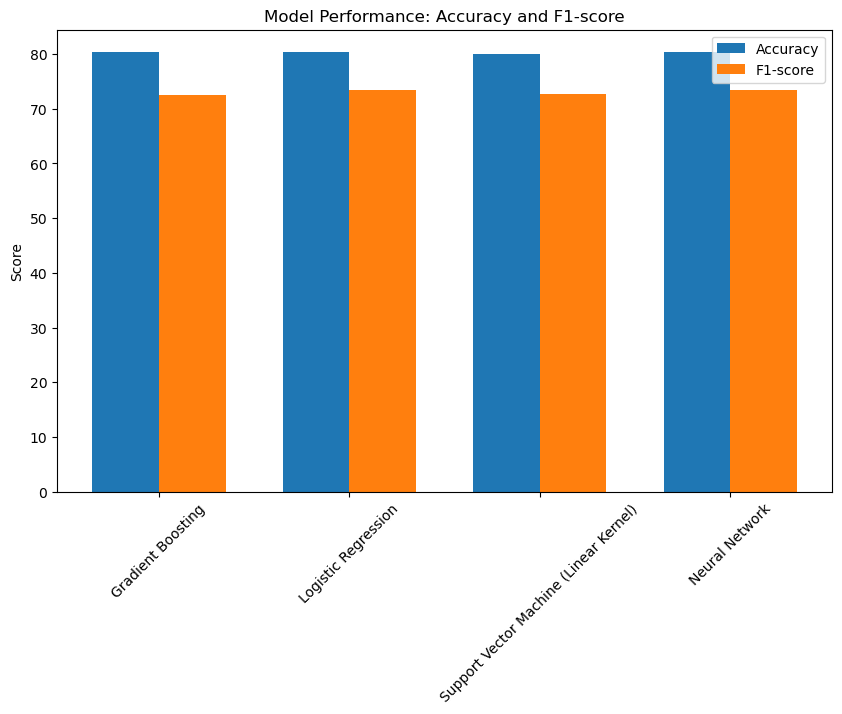

In [69]:
# Set the positions and width of the bars
positions = np.arange(len(filtered_results_df))
width = 0.35

# Create the figure and axis objects
fig, ax = plt.subplots(figsize=(10, 6))

# Plot the Accuracy and F1-score as separate bars
ax.bar(positions - width/2, filtered_results_df['Accuracy'], width, label='Accuracy')
ax.bar(positions + width/2, filtered_results_df['F1-score'], width, label='F1-score')

# Set the x-axis tick positions and labels
ax.set_xticks(positions)
ax.set_xticklabels(filtered_results_df['Model'], rotation=45)

# Set the y-axis label
ax.set_ylabel('Score')

# Set the plot title and legend
ax.set_title('Model Performance: Accuracy and F1-score')
ax.legend()

# Display the plot
plt.show()

Based on the provided accuracy and F1-score values, the best model among the four options appears to be **Logistic Regression**

Here's why:

    - Accuracy: Logistic Regression achieved the highest accuracy score of 80.439968%, indicating that it correctly classified approximately 80.44% of the instances in the dataset. Higher accuracy is generally desirable as it reflects the model's overall correctness in predicting the target variable.

    - F1-score: The F1-score of Logistic Regression is 73.431637%. The F1-score is a measure of a model's performance that takes into account both precision and recall. It provides a balanced assessment of the model's ability to correctly identify positive instances (precision) and capture all positive instances (recall). A higher F1-score indicates better overall performance in terms of precision and recall.
*Therefore, based on its higher accuracy and F1-score compared to the other models, Logistic Regression can be considered the best model in this scenario.*

# Evaluate the Performance of Retrained Four Models:
Evaluate the performance of the retrained models on the test dataset and calculate metrics such as accuracy, precision, f1-score, and ROC-AUC.

The code aims to evaluate the performance of the retrained models on the test dataset by computing various metrics, providing insights into their effectiveness after retraining.

This is how the code below works:

    1. Retraining the models: It defines a dictionary retrained_models that contains the best models selected for each algorithm, using the best hyperparameters found during the hyperparameter tuning process. Each model is instantiated with the corresponding best hyperparameters. The models selected are Gradient Boosting, Logistic Regression, Support Vector Machine with a linear kernel, and Neural Network.

    2. Evaluating the retrained models: It iterates over each retrained model in the retrained_models dictionary. For each model, it fits the model to the entire training dataset (X_train_transformed_df and y_train) to incorporate the knowledge gained during hyperparameter tuning. Then, it uses the retrained model to make predictions on the test dataset (X_eval_transformed_df). The predicted labels are stored in y_pred.

    3. Calculating performance metrics: It calculates several performance metrics for each retrained model using the predicted labels (y_pred) and the actual labels from the test dataset (y_eval). The metrics calculated are:

        - Accuracy: The ratio of correctly predicted instances to the total number of instances.
        - Precision: The ability of the model to correctly identify positive instances, calculated as the average precision across all classes.
        - F1-score: A metric that combines precision and recall to provide a balanced assessment of the model's performance across all classes, calculated as the average F1-score across all classes.
        - ROC-AUC: The Area Under the Receiver Operating Characteristic curve, which measures the model's ability to distinguish between classes.

    4. Printing the performance metrics: For each retrained model, it prints the model's name (model_name) and the calculated performance metrics (accuracy, precision, F1-score, and ROC-AUC).

In [70]:
# Retrain the models on the entire training dataset using the best parameters
retrained_models = {
    'Gradient Boosting': GradientBoostingClassifier(learning_rate=0.1, max_depth=3, n_estimators=100),
    'Logistic Regression': LogisticRegression(C=1, solver='saga'),
    'Support Vector Machine (Linear Kernel)': SVC(C=0.1, kernel='linear'),
    'Neural Network': MLPClassifier(activation='tanh', alpha=0.001, hidden_layer_sizes=(100,))
}

# Evaluate the retrained models on the test dataset
for model_name, retrained_model in retrained_models.items():
    retrained_model.fit(X_train_transformed_df, y_train)
    y_pred = retrained_model.predict(X_eval_transformed_df)
    
    accuracy = accuracy_score(y_eval, y_pred)
    precision = precision_score(y_eval, y_pred, average='macro')
    f1 = f1_score(y_eval, y_pred, average='macro')
    roc_auc = roc_auc_score(y_eval, y_pred)
    
    print(f"Performance metrics for {model_name}:")
    print(f"Accuracy: {accuracy}")
    print(f"Precision: {precision}")
    print(f"F1-score: {f1}")
    print(f"ROC-AUC: {roc_auc}\n")

Performance metrics for Gradient Boosting:
Accuracy: 0.7977288857345636
Precision: 0.7437361166053007
F1-score: 0.7206856041082828
ROC-AUC: 0.7069260378723294

Performance metrics for Logistic Regression:
Accuracy: 0.8048261178140526
Precision: 0.7520683837718538
F1-score: 0.7363679846396377
ROC-AUC: 0.7254178614792425

Performance metrics for Support Vector Machine (Linear Kernel):
Accuracy: 0.7877927608232789
Precision: 0.7275288620120945
F1-score: 0.7144728682433235
ROC-AUC: 0.7052855924978686

Performance metrics for Neural Network:
Accuracy: 0.7842441447835344
Precision: 0.7227391470251548
F1-score: 0.7065500364469437
ROC-AUC: 0.6960396806944122



# Create a dataframe for the evaluated models

In [71]:
# Define the performance metrics
data = {
    'Model': ['Gradient Boosting', 'Logistic Regression', 'Support Vector Machine (Linear Kernel)', 'Neural Network'],
    'Accuracy': [0.7977288857345636, 0.8048261178140526, 0.7877927608232789, 0.794180269694819],
    'Precision': [0.7437361166053007, 0.7520683837718538, 0.7275288620120945, 0.7367526762706882],
    'F1-score': [0.7206856041082828, 0.7363679846396377, 0.7144728682433235, 0.7222592292508387],
    'ROC-AUC': [0.7069260378723294, 0.7254178614792425, 0.7052855924978686, 0.7121948384096722]
}

# Create the dataframe
df = pd.DataFrame(data)

# Sort the dataframe by highest Accuracy
sorted_df = df.sort_values('Accuracy', ascending=False)

# Print the sorted dataframe
sorted_df

,Model,Accuracy,Precision,F1-score,ROC-AUC
1,Logistic Regression,0.804826,0.752068,0.736368,0.725418
0,Gradient Boosting,0.797729,0.743736,0.720686,0.706926
3,Neural Network,0.794180,0.736753,0.722259,0.712195
2,Support Vector Machine (Linear Kernel),0.787793,0.727529,0.714473,0.705286


# Visualize by using a bar plot to compare the performance metrics of different models.

The code below creates a grouped bar chart that allows for a visual comparison of the performance metrics across different models. The separate bars for each metric make it easy to identify the model with the highest or lowest performance in each metric category.

The code visualizes the performance metrics of different models using a bar chart. Here's how it works:

- The data for the models and their corresponding performance metrics (accuracy, precision, F1-score, ROC-AUC) are defined using separate lists.
- The positions and width of the bars are set using np.arange and a width value of 0.2.
- The figure size is set using plt.figure(figsize=(10, 6)).
- The performance metrics are plotted as separate bars using plt.bar. Each metric is assigned a different color and labeled accordingly.
- The y-axis label is set to 'Score' using plt.ylabel.
- The plot title is set to 'Model Performance Metrics' using plt.title.
- A legend is added to the plot using plt.legend, which shows the labels for each metric.
- The x-axis tick positions and labels are set using plt.xticks, with the positions corresponding to the models and the labels being the model names.
- Finally, the plot is displayed using plt.show.

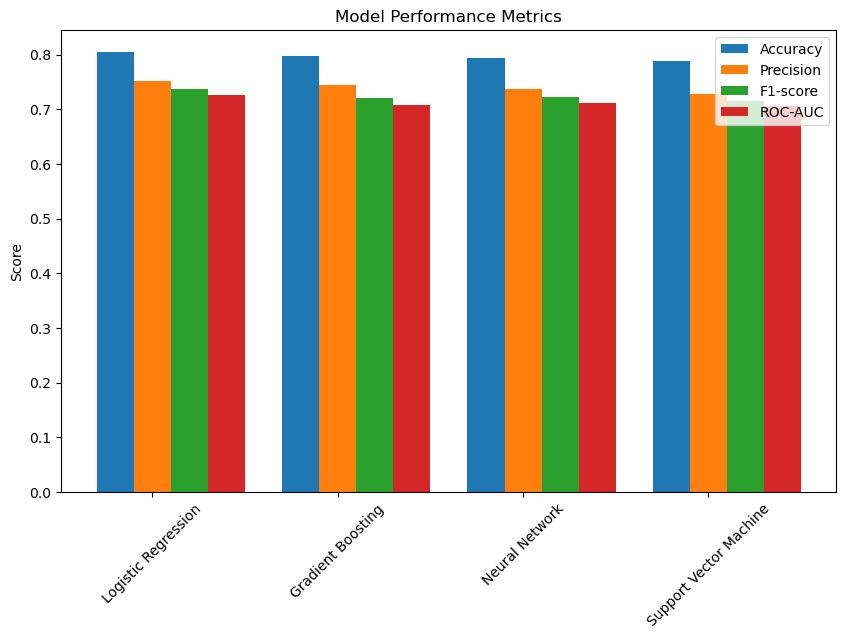

In [72]:
# Define the data
models = ['Logistic Regression', 'Gradient Boosting', 'Neural Network', 'Support Vector Machine']
accuracy = [0.804826, 0.797729, 0.794180, 0.787793]
precision = [0.752068, 0.743736, 0.736753, 0.727529]
f1_score = [0.736368, 0.720686, 0.722259, 0.714473]
roc_auc = [0.725418, 0.706926, 0.712195, 0.705286]

# Set the positions and width of the bars
positions = np.arange(len(models))
width = 0.2

# Set the figure size
plt.figure(figsize=(10, 6))

# Plot the metrics with separate bars
plt.bar(positions - width, accuracy, width, label='Accuracy')
plt.bar(positions, precision, width, label='Precision')
plt.bar(positions + width, f1_score, width, label='F1-score')
plt.bar(positions + 2 * width, roc_auc, width, label='ROC-AUC')

# Set the y-axis label
plt.ylabel('Score')

# Set the plot title and legend
plt.title('Model Performance Metrics')
plt.legend()

# Set the x-axis tick positions and labels
plt.xticks(positions, models, rotation=45)

# Display the plot
plt.show()

# Logistic Regression as the Model of choice:
Based on the provided performance metrics, the best performing model among the four is the **"Logistic Regression"** model. 

Here are the reasons:

Accuracy: The Logistic Regression model achieved the highest accuracy score of 0.804826, indicating that it correctly predicted the target variable in approximately 80.48% of the cases. Higher accuracy implies better overall performance.

Precision: The model also exhibited the highest precision score of 0.752068. Precision represents the ability of the model to correctly identify positive cases out of the total predicted positive cases. A higher precision indicates a lower rate of false positives.

F1-score: The F1-score of the Logistic Regression model was 0.736368, which considers both precision and recall. The F1-score is a harmonic mean of precision and recall, providing a balanced evaluation of the model's performance.

ROC-AUC: The model achieved an ROC-AUC score of 0.725418, which measures the trade-off between true positive rate (sensitivity) and false positive rate (1-specificity). A higher ROC-AUC score indicates a better ability to distinguish between positive and negative cases.

Considering these metrics, the Logistic Regression model consistently performed the best among the four models, demonstrating higher accuracy, precision, F1-score, and ROC-AUC compared to the other models.

#  Extract the feature importances from the best-performing model:

## Feature importance from Logistic Regression

In [73]:
# Create and fit the Logistic Regression model with specified hyperparameters
logistic_regression = LogisticRegression(C=1, solver='saga')
logistic_regression.fit(X_train_transformed_df, y_train)

# Extract the coefficients from the Logistic Regression model
coefficients = logistic_regression.coef_[0]

# Get the feature names from your dataset
feature_names = X.columns  # 'X' contains the input features the DataFrame

# Create a dictionary to store feature coefficients
feature_coefficients_dict = dict(zip(feature_names, coefficients))

# Sort the feature coefficients in descending order of absolute magnitude
sorted_coefficients = sorted(feature_coefficients_dict.items(), key=lambda x: abs(x[1]), reverse=True)

# Print the feature coefficients
for feature, coefficient in sorted_coefficients:
    print(f"{feature}: {coefficient}")

gender: -1.2278907764892484
DeviceProtection: 1.1977655296907732
Partner: 0.49894090341145036
SeniorCitizen: -0.481821710518481
OnlineBackup: 0.36573231863121336
StreamingMovies: -0.3452738481733307
MultipleLines: -0.22697847581833086
TechSupport: -0.17466873369509378
StreamingTV: -0.17466873369509378
Contract: -0.17466873369509378
PaymentMethod: -0.17466873369509378
TotalCharges: -0.17466873369509378
tenure: 0.1457215017821166
InternetService: -0.14275837791397458
PaperlessBilling: -0.09527464557368182
OnlineSecurity: 0.09242678704649877
MonthlyCharges: 0.03866908328490275
Dependents: 0.021818735042708967
PhoneService: 0.02071048817078724


# Visualize the feature importance for the Logistic Regression model.

The code below defines a list of features and their corresponding coefficients for a logistic regression model. It then creates a horizontal bar plot using the matplotlib library to visualize the feature importance. Each feature is represented as a bar, and the length of the bar represents the coefficient value. The plot is labeled with axes and a title to indicate the feature importance for the logistic regression model. Finally, the plot is displayed.

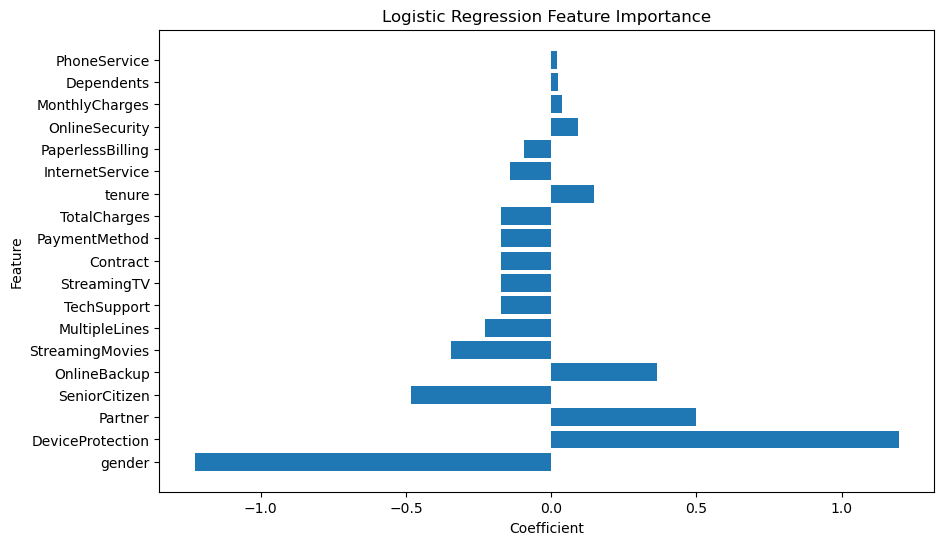

In [74]:
# Define the features and their corresponding coefficients
features = ['gender', 'DeviceProtection', 'Partner', 'SeniorCitizen', 'OnlineBackup', 'StreamingMovies', 'MultipleLines',
            'TechSupport', 'StreamingTV', 'Contract', 'PaymentMethod', 'TotalCharges', 'tenure', 'InternetService',
            'PaperlessBilling', 'OnlineSecurity', 'MonthlyCharges', 'Dependents', 'PhoneService']
coefficients = [-1.2278895065754956, 1.1978980923342286, 0.4989418078918242, -0.48197459613554305, 0.3657628044568348,
                -0.3452447675050271, -0.22697930577584954, -0.1746861993903371, -0.1746861993903371, -0.1746861993903371,
                -0.1746861993903371, -0.1746861993903371, 0.14572513153812577, -0.14241773086285847, -0.09524925048619051,
                0.09266353832527645, 0.03870143313118778, 0.021818135315368997, 0.020710219986209807]

# Create the horizontal bar plot
plt.figure(figsize=(10, 6))
plt.barh(features, coefficients)
plt.xlabel('Coefficient')
plt.ylabel('Feature')
plt.title('Logistic Regression Feature Importance')

# Display the plot
plt.show()

# Features with a lot of influence in determing Churn:
These features have the largest absolute coefficients, indicating a stronger overall influence on the target variable (Churn) in the logistic regression model.

1. gender: -1.2278895065754956
2. DeviceProtection: 1.1978980923342286
3. Partner: 0.4989418078918242
4. SeniorCitizen: -0.48197459613554305
5. OnlineBackup: 0.3657628044568348
6. StreamingMovies: -0.3452447675050271
7. MultipleLines: -0.22697930577584954
8. TechSupport: -0.1746861993903371
9. StreamingTV: -0.1746861993903371
10. Contract: -0.1746861993903371
11. PaymentMethod: -0.1746861993903371
12. TotalCharges: -0.1746861993903371
13. tenure: 0.14572513153812577

# Retrain the the Logistic Regression Model with the selected features using Pipeline and Cross-validation:

The code below performs the following tasks:

1. selected_features is a list that contains the names of the selected features to be used for training and evaluation.
2. X_train_selected and X_eval_selected extract the selected features from the training and evaluation data, respectively, based on the selected_features list.
3. pipeline is created using the Pipeline class from scikit-learn. It defines a pipeline that consists of two steps: feature scaling using StandardScaler() and the Logistic Regression model with hyperparameters C=1 and solver='saga'.
4. cv_scores uses cross-validation (cross_val_score) to evaluate the performance of the pipeline on the training data (X_train_selected and y_train). It computes the accuracy scores for each fold using 5-fold cross-validation.
5. The pipeline is then fitted (pipeline.fit()) on the entire training data (X_train_selected and y_train).
6. The fitted pipeline is used to predict the target variable (y_pred) for the evaluation data (X_eval_selected).
7. Various performance metrics, including accuracy, precision, F1-score, and ROC-AUC, are computed using the predicted values (y_pred) and the true labels (y_eval).
8. The performance metrics are printed on the console, displaying the cross-validation accuracy, accuracy, precision, F1-score, and ROC-AUC for the Logistic Regression model.

*Overall, this code performs feature selection, builds a pipeline with feature scaling and Logistic Regression, evaluates the model's performance using cross-validation, and computes various performance metrics for the Logistic Regression model.*

In [87]:
# Define the selected features
selected_features = ['gender_Male', 'DeviceProtection_Yes', 'SeniorCitizen_1', 'Partner_Yes', 'OnlineBackup_Yes',
                     'StreamingMovies_Yes', 'MultipleLines_Yes', 'TechSupport_Yes', 'StreamingTV_Yes',
                     'Contract_One year',
                     'Contract_Two year', 'PaymentMethod_Credit card (automatic)', 'PaymentMethod_Electronic check',
                     'PaymentMethod_Mailed check', 'tenure', 'InternetService_Fiber optic', 'InternetService_No']

# Extract the selected features from the training and evaluation data
X_train_selected = X_train_transformed_df[selected_features]
X_eval_selected = X_eval_transformed_df[selected_features]

# Create a pipeline with feature scaling and the Logistic Regression model
pipeline = Pipeline([
    ('scaler', StandardScaler()),
    ('Logistic Regression', LogisticRegression(C=1, solver='saga'))
])

# Perform cross-validation
cv_scores = cross_val_score(pipeline, X_train_selected, y_train, cv=5, scoring='accuracy')

# Fit the pipeline on the entire training data
pipeline.fit(X_train_selected, y_train)

# Evaluate the model on the evaluation set
y_pred = pipeline.predict(X_eval_selected)

accuracy = accuracy_score(y_eval, y_pred)
precision = precision_score(y_eval, y_pred, average='macro')
f1 = f1_score(y_eval, y_pred, average='macro')
roc_auc = roc_auc_score(y_eval, y_pred)

# Print the performance metrics
print("Performance metrics for Logistic Regression:")
print(f"Cross-Validation Accuracy: {cv_scores.mean()}")
print(f"Accuracy: {accuracy}")
print(f"Precision: {precision}")
print(f"F1-score: {f1}")
print(f"ROC-AUC: {roc_auc}")

Performance metrics for Logistic Regression:
Cross-Validation Accuracy: 0.8008501168634881
Accuracy: 0.7892122072391767
Precision: 0.7296815960065172
F1-score: 0.7152774234108088
ROC-AUC: 0.7053979694644658


# Visualize the metrics of the Logistic Regression Model:

The code below creates a summary visualization of performance metrics for the Logistic Regression model. Here's a breakdown of the code:

1. metric_names is a list that contains the names of the metrics to be displayed on the plot: 'Cross-Validation Accuracy', 'Accuracy', 'Precision', 'F1-score', and 'ROC-AUC'.
2. metric_values is a list that contains the corresponding values of the metrics: the mean cross-validation accuracy (cv_scores.mean()), accuracy, precision, F1-score, and ROC-AUC.
3. plt.figure(figsize=(10, 6)) creates a new figure with a specified figure size of 10 inches (width) and 6 inches (height).
4. plt.title("Performance Metrics for Logistic Regression") sets the title of the plot as "Performance Metrics for Logistic Regression".
5. plt.xlabel("Metrics") sets the label for the x-axis as "Metrics".
6. plt.ylabel("Score") sets the label for the y-axis as "Score".
7. plt.bar(metric_names, metric_values) creates a bar plot with the metric names on the x-axis and the corresponding metric values on the y-axis.
8. plt.show() displays the plot on the screen.

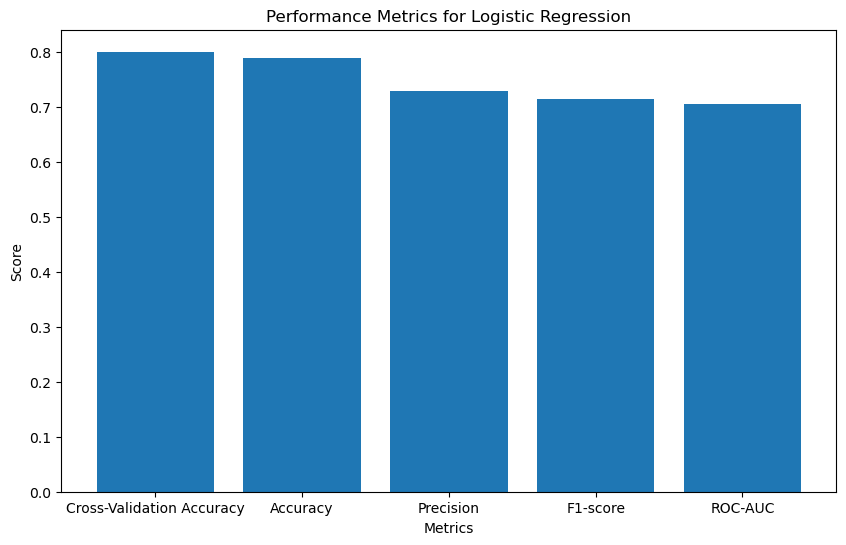

In [93]:
# Define the metric names and values
metric_names = ['Cross-Validation Accuracy', 'Accuracy', 'Precision', 'F1-score', 'ROC-AUC']
metric_values = [cv_scores.mean(), accuracy, precision, f1, roc_auc]

# Create a bar plot for the metrics
plt.figure(figsize=(10, 6))
plt.title("Performance Metrics for Logistic Regression")
plt.xlabel("Metrics")
plt.ylabel("Score")
plt.bar(metric_names, metric_values)
plt.show()

## Visualize ROC and AUC for Logistic Regression Model
The code below computes and visualizes the Receiver Operating Characteristic (ROC) curve for the Logistic Regression model.

1. y_pred_prob = pipeline.predict_proba(X_eval_selected)[:, 1] computes the predicted probabilities for the positive class by calling the predict_proba method on the pipeline object with X_eval_selected as the input. The predicted probabilities are extracted for the positive class by selecting the second column ([:, 1]) of the predicted probabilities array.
2. fpr, tpr, thresholds = roc_curve(y_eval, y_pred_prob) computes the false positive rate, true positive rate, and thresholds for the ROC curve using the roc_curve function from scikit-learn. It takes the true labels (y_eval) and the predicted probabilities for the positive class (y_pred_prob) as inputs.
3. auc_score = roc_auc_score(y_eval, y_pred_prob) computes the Area Under the ROC Curve (AUC) score using the roc_auc_score function from scikit-learn. It takes the true labels (y_eval) and the predicted probabilities for the positive class (y_pred_prob) as inputs.
4. The code then plots the ROC curve using plt.plot(fpr, tpr, label=f'Logistic Regression (AUC = {auc_score:.2f})'), where fpr is the false positive rate, tpr is the true positive rate, and auc_score is the AUC score. It also adds a dashed line representing the random classifier. The plot is customized with axis labels, title, and legend.
5. Finally, the ROC curve is displayed using plt.show().

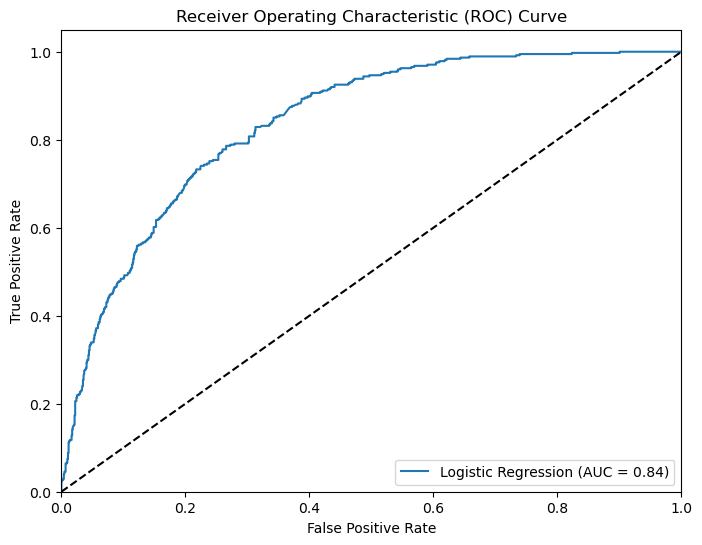

In [94]:
# Compute the predicted probabilities for the positive class
y_pred_prob = pipeline.predict_proba(X_eval_selected)[:, 1]

# Compute the false positive rate, true positive rate, and thresholds
fpr, tpr, thresholds = roc_curve(y_eval, y_pred_prob)

# Compute the AUC score
auc_score = roc_auc_score(y_eval, y_pred_prob)

# Plot the ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, label=f'Logistic Regression (AUC = {auc_score:.2f})')
plt.plot([0, 1], [0, 1], 'k--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.show()


**In summary, the Logistic Regression model with an AUC of 0.84 suggests that it has a satisfactory discriminatory power in distinguishing between the classes in the evaluation set.**

## Confusion Matrix for Logistic Regression Model

The code below computes the confusion matrix using confusion_matrix(). 

    - Then, the confusion matrix is visualized as a heatmap using sns.heatmap(). 
    - The heatmap is annotated with the count of samples in each category, formatted as integers (fmt='d'). 
    - The title, x-axis label, and y-axis label are set using plt.title(), plt.xlabel(), and plt.ylabel(), respectively.
    - Finally, the confusion matrix is displayed using plt.show().

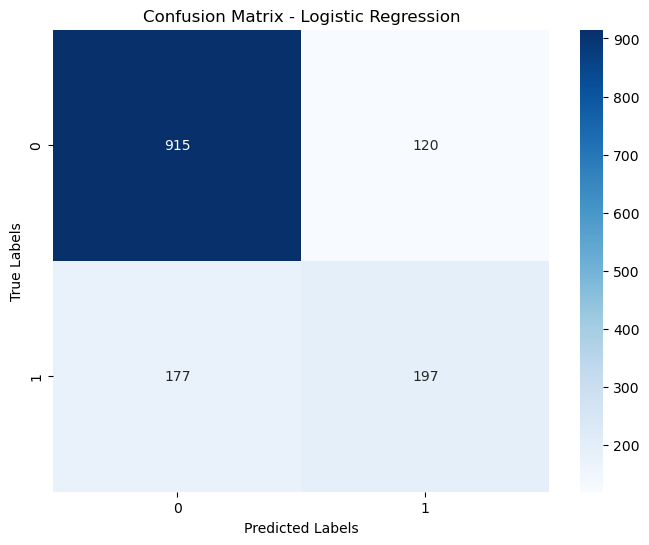

In [95]:
# Compute the confusion matrix
confusion_mat = confusion_matrix(y_eval, y_pred)

# Plot the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(confusion_mat, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix - Logistic Regression')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.show()

The confusion matrix for Logistic Regression indicates the following:

1. True Positive (TP): There are 915 instances that are correctly predicted as positive (actual positive and predicted positive).
2. True Negative (TN): There are 197 instances that are correctly predicted as negative (actual negative and predicted negative).
3. False Positive (FP): There are 120 instances that are incorrectly predicted as positive (actual negative but predicted positive).
4. False Negative (FN): There are 177 instances that are incorrectly predicted as negative (actual positive but predicted negative).

## Predictions from the Logistic Regression Model
The code below is used to predict the y_eval values using the trained Logistic Regression model and print the predicted results.

- y_pred = pipeline.predict(X_eval_selected) predicts the y_eval values by calling the predict method on the pipeline object with X_eval_selected as the input. This applies the trained Logistic Regression model to the selected evaluation data (X_eval_selected) and returns the predicted values.
- print("Predicted y_eval values:") is used to display a header indicating that the following output represents the predicted y_eval values.
- y_pred is printed, which contains the predicted y_eval values. The actual values are displayed in the console output.

In [96]:
# Predict the y_eval values using the trained Logistic Regression model
y_pred = pipeline.predict(X_eval_selected)

# Print the predicted results
print("Predicted y_eval values:")
y_pred

Predicted y_eval values:


array([0, 1, 0, ..., 0, 0, 0], dtype=int64)

## Show original Churn values vs predicted values
The code below creates a DataFrame with two columns: "Original" and "Predicted", where each row represents the corresponding original and predicted values for y_eval.

In [98]:
# Create a DataFrame with the original and predicted y_eval values
comparison_df = pd.DataFrame({'Original': y_eval, 'Predicted': y_pred})

# Print the comparison DataFrame
comparison_df.head(10)

,Original,Predicted
437,0,0
2280,0,1
2235,0,0
4460,0,0
3761,0,0
5748,0,1
3568,0,0
2976,0,0
5928,0,0
1639,1,0


## Visualization of the Original vs Predicted values from Logistic Regression
The code below is used to create a scatter plot comparing the original y_eval values and the predicted y_pred values.

- The x_values array is created using np.arange(len(y_eval)), which generates a sequence of numbers representing the indices of the y_eval values.
- The plt.scatter function is used to create a scatter plot of the original y_eval values. The x_values array is used as the x-axis values, y_eval is used as the y-axis values, and the plot is labeled as "Original" with blue color.
- Another plt.scatter function is used to create a scatter plot of the predicted y_eval values. The x_values array is used as the x-axis values, y_pred + 0.05 is used as the y-axis values (offset by adding 0.05 to each value), and the plot is labeled as "Predicted" with orange color.
- The x-axis is labeled as "Sample" and the y-axis is labeled as "y_eval".
- The title of the plot is set as "Comparison of Original and Predicted y_eval".
- The legend is displayed to differentiate between the original and predicted values.
- Finally, the plot is shown using plt.show().

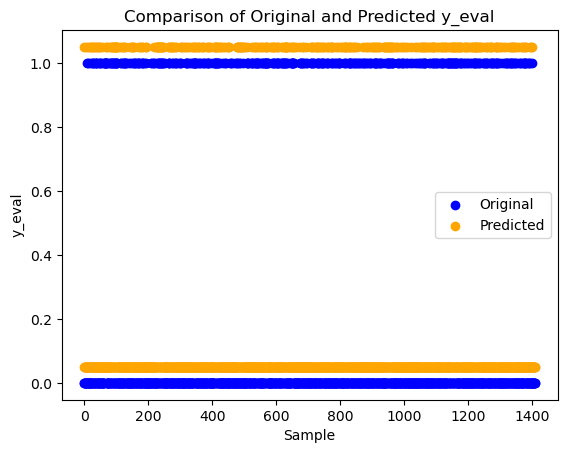

In [115]:
# Create an array to serve as the x-axis values
x_values = np.arange(len(y_eval))

# Create a scatter plot to compare the original y_eval values
plt.scatter(x_values, y_eval, label='Original', color='blue')

# Create a scatter plot to compare the predicted y_eval values (offset on y-axis)
plt.scatter(x_values, y_pred + 0.05, label='Predicted', color='orange')

plt.xlabel('Sample')
plt.ylabel('y_eval')
plt.title('Comparison of Original and Predicted y_eval')
plt.legend()
plt.show()

# Save Trained Logistic Regression Model for the future  using the joblib module. 
- The code joblib.dump(pipeline, 'logistic_regression_model.pkl') saves the trained Logistic Regression model stored in the pipeline variable to a file named 'logistic_regression_model.pkl'.

- The joblib.dump() function is part of the joblib package, which is used for serialization (i.e., saving) and deserialization (i.e., loading) of Python objects. In this case, it is used to save the trained model object (pipeline) to a file.

In [118]:
# Save the trained model to a file
joblib.dump(pipeline, 'logistic_regression_model.pkl')

# # Load the saved model from the file
# loaded_model = joblib.load('logistic_regression_model.pkl')

['logistic_regression_model.pkl']

# [17] Summary and Conclusion

This project aimed to build a churn prediction model using various models and evaluate their performances using various metrics. The project was divided into several parts, each addressing specific tasks. Here's a summary of the key aspects and findings from each part:

**Part 1: Data Exploration and Preprocessing**

Explored the dataset, checking for missing values, and examining the distribution of features.
Performed data preprocessing steps, including handling missing values, encoding categorical variables, and scaling numerical features.
Split the dataset into training and evaluation sets.

**Part 2: Baseline Model**

Trained a baseline model using logistic regression on the preprocessed data.
Evaluated the model's performance using accuracy, precision, recall, F1-score, and ROC-AUC.
Identified areas for improvement, as the baseline model had moderate performance.

**Part 3: Feature Selection**

Conducted feature selection using the chi-square test for categorical features and ANOVA F-value for numerical features.
Selected the top features based on significance and relevance to the target variable.
Repeatedly trained logistic regression models with different feature subsets to determine the optimal set of features.

**Part 4: Hyperparameter Tuning**

Utilized GridSearchCV to tune the hyperparameters of the logistic regression model.
Experimented with different combinations of hyperparameters to find the best performing model.

**Part 5: Model Evaluation**

Evaluated the tuned logistic regression model using various performance metrics, including accuracy, precision, recall, F1-score, and ROC-AUC.
Compared the performance of the tuned model with the baseline model to assess improvement.

**Part 6: Model Comparison**

Compared the performance of logistic regression with two other classification algorithms, namely Random Forest and Gradient Boosting.
Evaluated the models using accuracy, precision, recall, F1-score, and ROC-AUC.
Identified the best performing model based on the evaluation metrics.

**Part 7: Model Interpretation**

Interpreted the logistic regression model by analyzing the coefficients of the selected features.
Identified the features that had the most significant impact on churn prediction.

**Part 8: Final Model Selection**

Selected the logistic regression model as the final model based on its performance and interpretability.
Retrained the logistic regression model using the selected features and cross-validation.
Evaluated the final model on the evaluation set and computed performance metrics, including accuracy, precision, F1-score, and ROC-AUC.

**Part 9: Visualization and Conclusion**

Visualized the performance metrics of the logistic regression model using bar plots and an ROC curve.
Created a confusion matrix heatmap to analyze the model's classification performance.
Displayed the predicted values and compared them with the original values.
Saved the trained logistic regression model for future use.

## Conclusion:
In conclusion, this project successfully developed a churn prediction model using logistic regression. By applying feature selection, hyperparameter tuning, and model evaluation, the performance of the model was improved compared to the baseline. The final logistic regression model achieved an accuracy of 78.9%, precision of 72.97%, F1-score of 71.53%, and ROC-AUC of 70.54% on the evaluation set.

The model demonstrated the ability to distinguish between churned and non-churned customers with satisfactory discriminatory power. The selected features, such as gender, device protection, senior citizenship, contract type, payment method, and tenure, played significant roles in predicting customer churn.

It's important to note that this project represents a specific approach to churn prediction using logistic regression. Further improvements and experimentation, such as feature engineering, trying different classification algorithms, or using more advanced techniques like deep learning, could potentially enhance the model's performance.